In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings

warnings.filterwarnings("ignore")


from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [81]:
data = pd.read_csv("second_datasetcsv.csv", sep=",")

In [82]:
print(f"Shape Of The dataset : {data.shape}")
print(f"\nGlimpse Of The dataset :")
data.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Shape Of The dataset : (2627, 10)

Glimpse Of The dataset :


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.000000,Low,1.000000,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.000000,Cat_6
2,458996,Female,Yes,69,No,nan,0.000000,Low,1.000000,Cat_6
3,459000,Male,Yes,59,No,Executive,11.000000,High,2.000000,Cat_6
4,459001,Female,No,19,No,Marketing,nan,Low,4.000000,Cat_6


In [83]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None


In [84]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Summary Of The Dataset :


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [85]:
data.describe(include=object).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,count,unique,top,freq
Gender,2627,2,Male,1424
Ever_Married,2577,2,Yes,1520
Graduated,2603,2,Yes,1602
Profession,2589,9,Artist,802
Spending_Score,2627,3,Low,1616
Var_1,2595,7,Cat_6,1672


In [86]:
print(f"Null values of the new_dfset :")
data.isna().sum().to_frame().T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Null values of the new_dfset :


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,50,0,24,38,269,0,113,32


In [87]:
#dropping Var_1
data = data.drop(columns="Var_1")

In [88]:
data.dropna(axis=0, inplace=True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After dropping null values, the shape of the Dataset is (2178, 9)
After dropping null values, null values of the Dataset :


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,0,0,0,0,0,0,0,0


In [89]:
new_df=data
print("After preprocessing, let's have a glimpse of the final dataset :")
new_df.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After preprocessing, let's have a glimpse of the final dataset :


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,Female,Yes,36,Yes,Engineer,0.000000,Low,1.000000
1,458994,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.000000
3,459000,Male,Yes,59,No,Executive,11.000000,High,2.000000
5,459003,Male,Yes,47,Yes,Doctor,0.000000,High,5.000000
6,459005,Male,Yes,61,Yes,Doctor,5.000000,Low,3.000000


In [90]:
print(f"After preprocessing, let's have a look on the summary of the dataset :")
new_df.describe().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After preprocessing, let's have a look on the summary of the dataset :


,ID,Age,Work_Experience,Family_Size
count,2178.000000,2178.000000,2178.000000,2178.000000
mean,463489.608815,43.429752,2.560606,2.839302
std,2591.438363,16.755445,3.351447,1.564970
min,458989.000000,18.000000,0.000000,1.000000
25%,461278.000000,30.000000,0.000000,2.000000
50%,463521.500000,41.000000,1.000000,2.000000
75%,465704.750000,52.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [91]:
new_df.describe(include=object).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,count,unique,top,freq
Gender,2178,2,Male,1193
Ever_Married,2178,2,Yes,1286
Graduated,2178,2,Yes,1358
Profession,2178,9,Artist,706
Spending_Score,2178,3,Low,1338


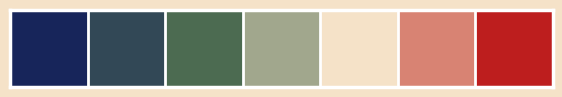

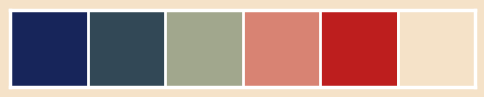

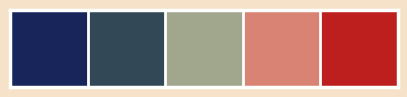

In [92]:
sns.set_style("white")
sns.set(rc={"axes.facecolor": "#F5E2C8", "figure.facecolor": "#F5E2C8"})
sns.set_context("poster", font_scale=0.7)

palette = ["#17255A", "#324856", "#4C6B51", "#A1A78D", "#F5E2C8", "#D88373", "#BD1E1E"]
# palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap = ["#17255A", "#324856", "#A1A78D", "#D88373", "#BD1E1E", "#F5E2C8"]
cluster = ["#17255A", "#324856", "#A1A78D", "#D88373", "#BD1E1E"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_cmap))
sns.palplot(sns.color_palette(cluster))
plt.show()

# 682F2F #585858

Rozkład gęstości wieku klientów:


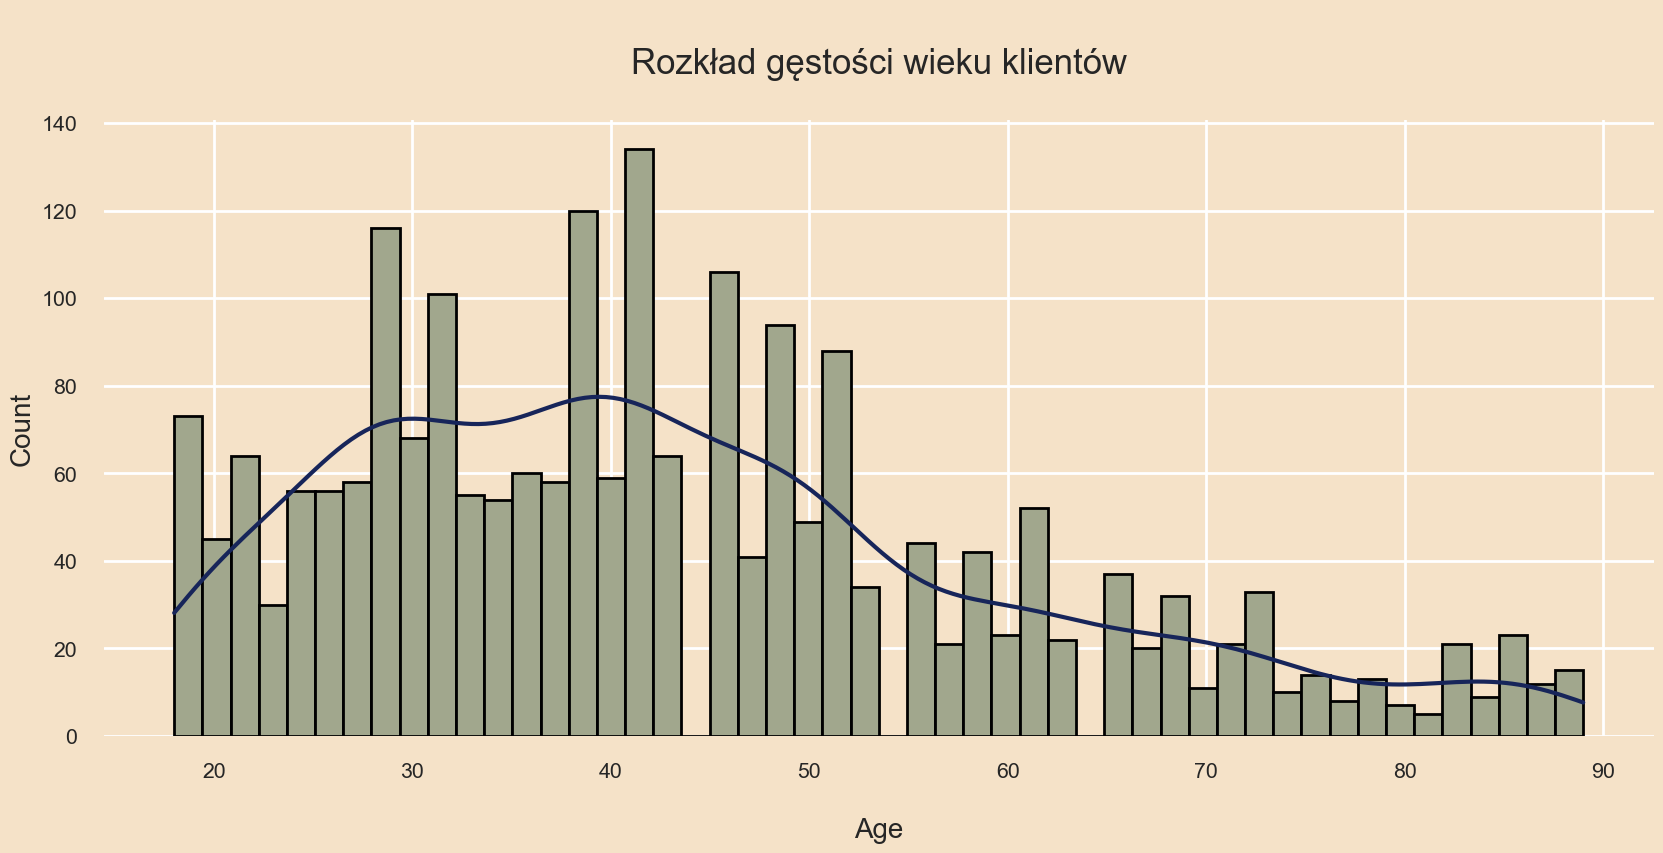

In [93]:
print(f"Rozkład gęstości wieku klientów:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(
    new_df["Age"],
    color="#A1A78D",
    kde=True,
    bins=50,
    alpha=1,
    fill=True,
    edgecolor="black",
)
p.axes.lines[0].set_color(palette[0])
p.axes.set_title("\nRozkład gęstości wieku klientów\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAge", fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the distribution of customer's spending scores:


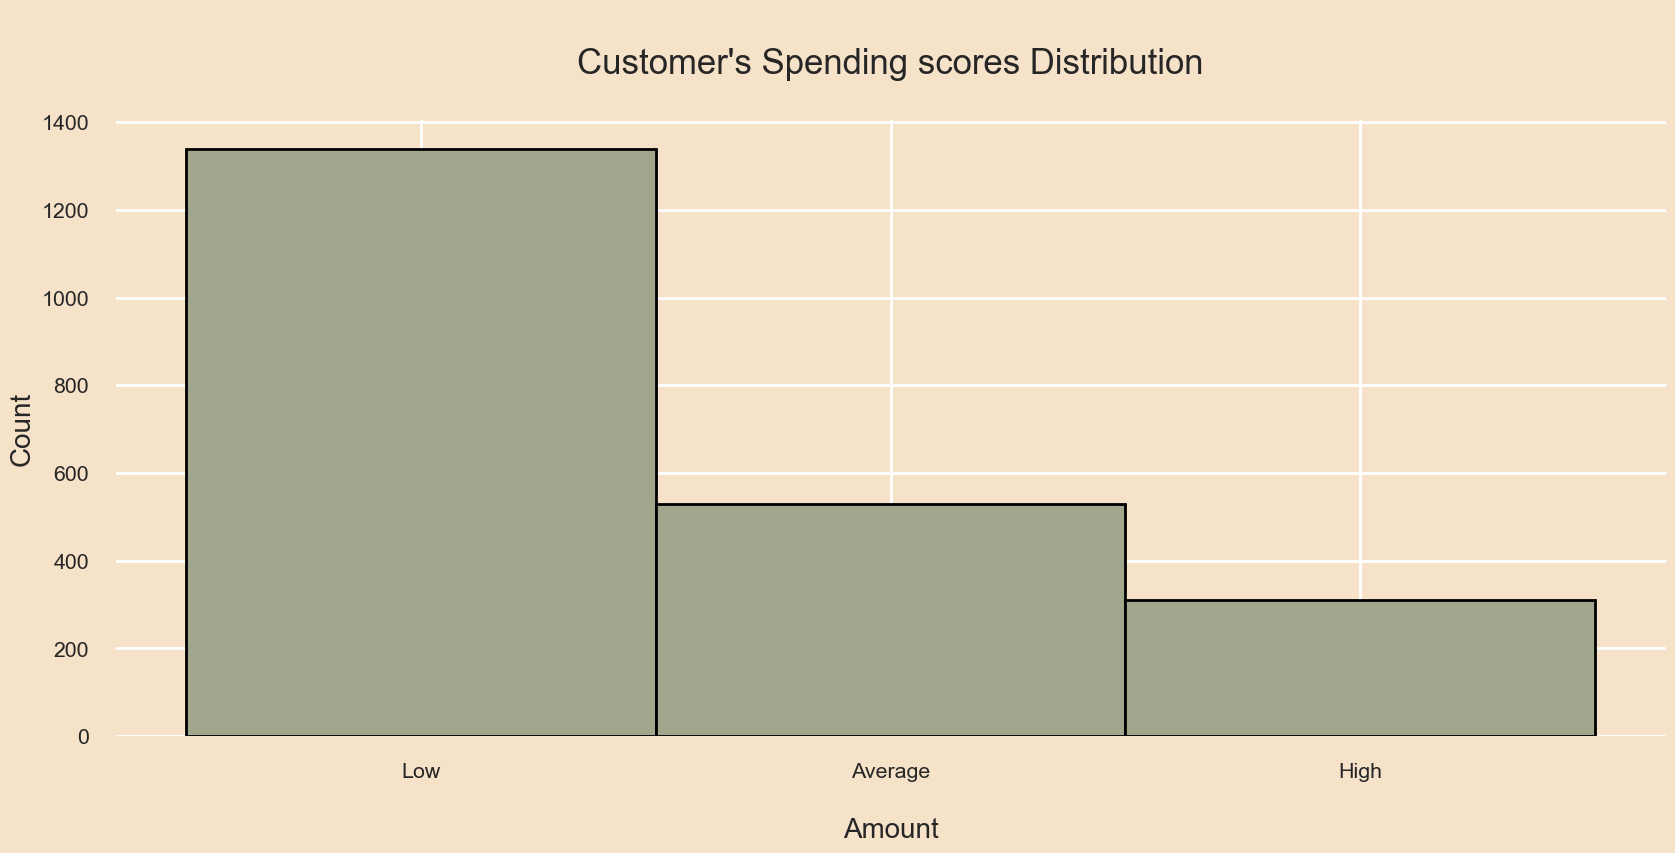

In [94]:
#nie ma income, ale będzie samo spending
print(f"Let's have a look on the distribution of customer's spending scores:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Spending_Score"],color="#A1A78D",alpha=1,fill=True,edgecolor="black", stat="count")
p.axes.set_title("\nCustomer's Spending scores Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the customer's education :


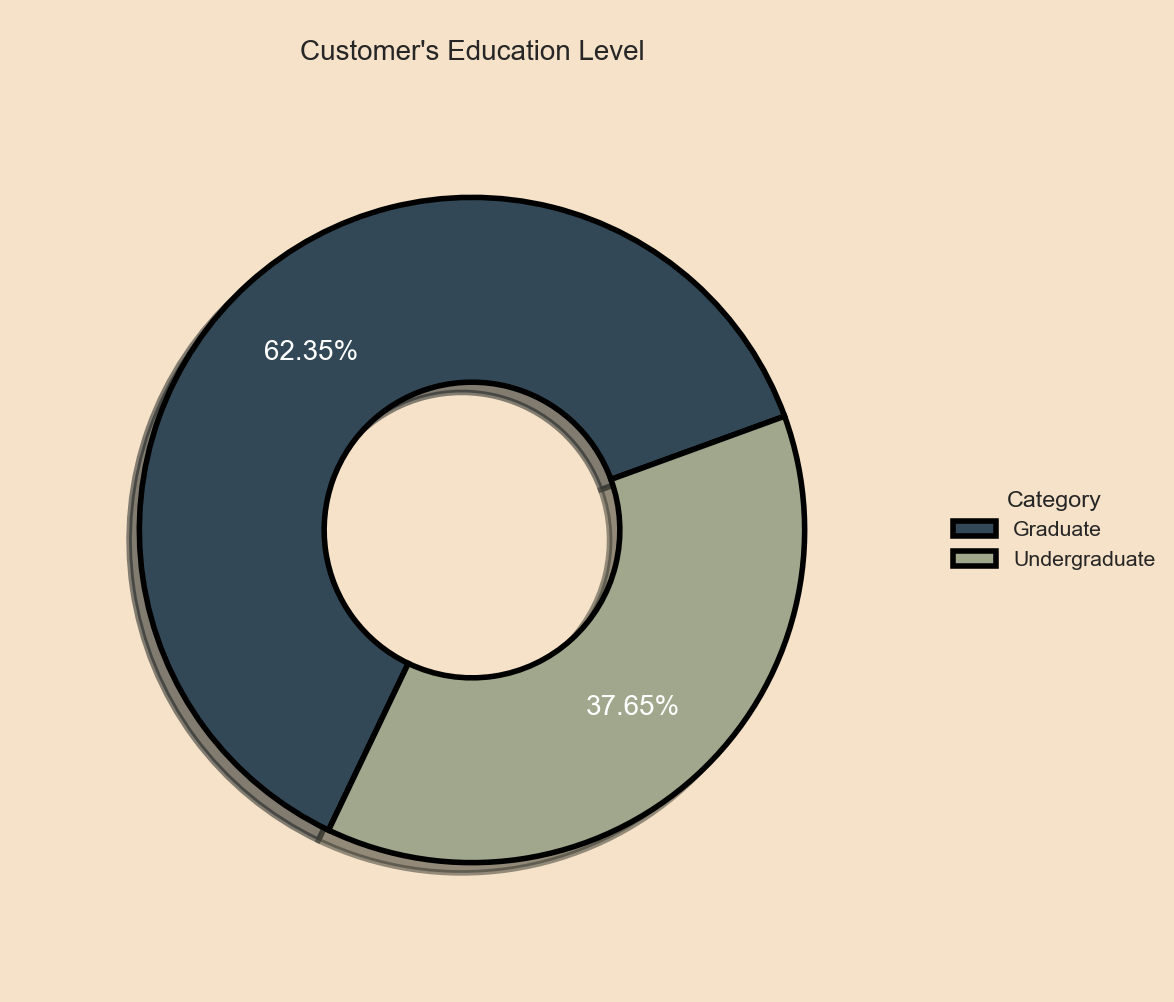

In [95]:
print(f"Let's have a look on the customer's education :")
plt.subplots(figsize=(12, 12))

labels = "Graduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Graduated"].value_counts()["Yes"],
                                    data["Graduated"].value_counts()["No"]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#324856","#A1A78D"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

Let's have a look on the customer's professions :


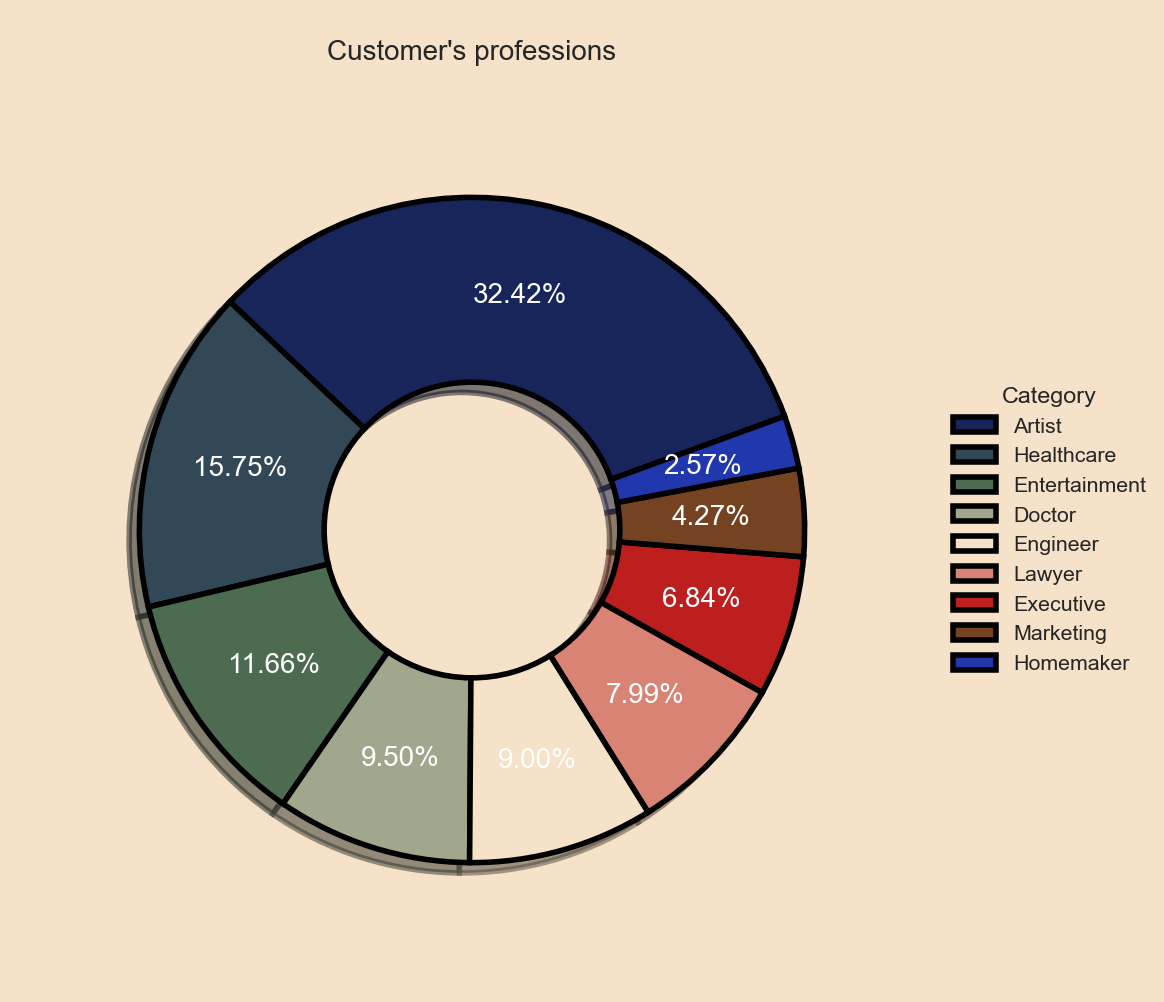

In [96]:
print(f"Let's have a look on the customer's professions :")
plt.subplots(figsize=(12, 12))

labels = 'Artist', 'Healthcare', 'Entertainment', 'Doctor', 'Engineer', 'Lawyer', 'Executive', 'Marketing', 'Homemaker'
size = 0.5

wedges, texts, autotexts = plt.pie([data["Profession"].value_counts()[prof] for prof in labels],
                                    # explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#17255A","#324856", "#4C6B51","#A1A78D","#F5E2C8","#D88373","#BD1E1E", "#754321","#2137AD"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's professions",fontsize=20)
plt.show()

Let's have a look on the distribution of customer's spending on basis of profession:


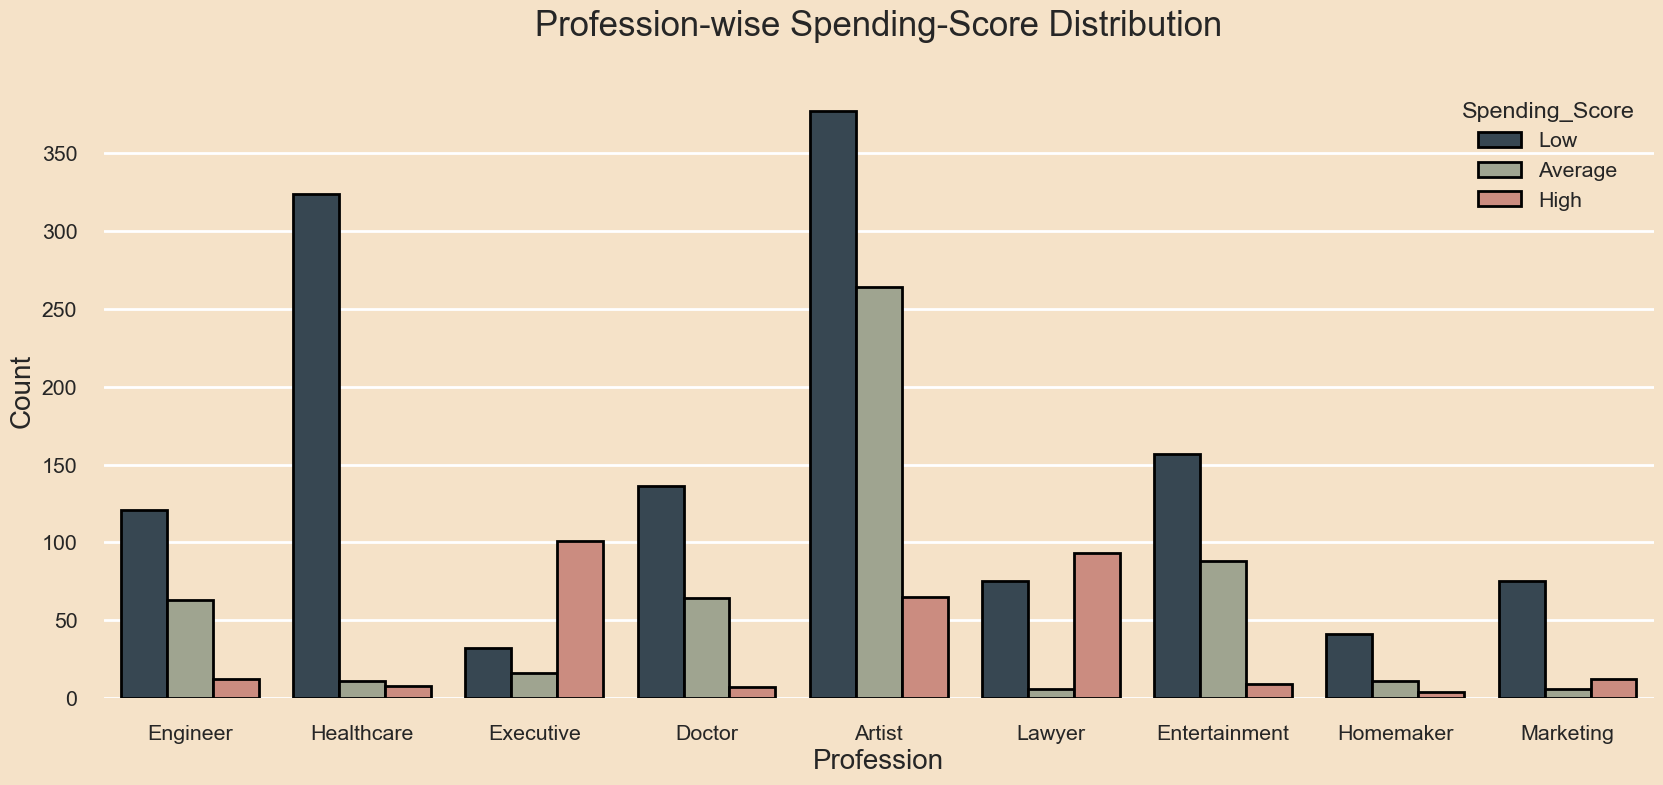

In [97]:
print(f"Let's have a look on the distribution of customer's spending on basis of profession:")

plt.subplots(figsize=(20, 8))

sns.countplot(data, x="Profession", hue="Spending_Score", palette=["#324856","#A1A78D","#D88373"],edgecolor="black")
plt.ylabel("Count",fontsize=20)
plt.xlabel("Profession",fontsize=20)
sns.despine(left=True, bottom=True)
plt.title("Profession-wise Spending-Score Distribution\n",fontsize=25)

plt.show()

Let's have a look on the distribution of customer's spending on basis of work experience:


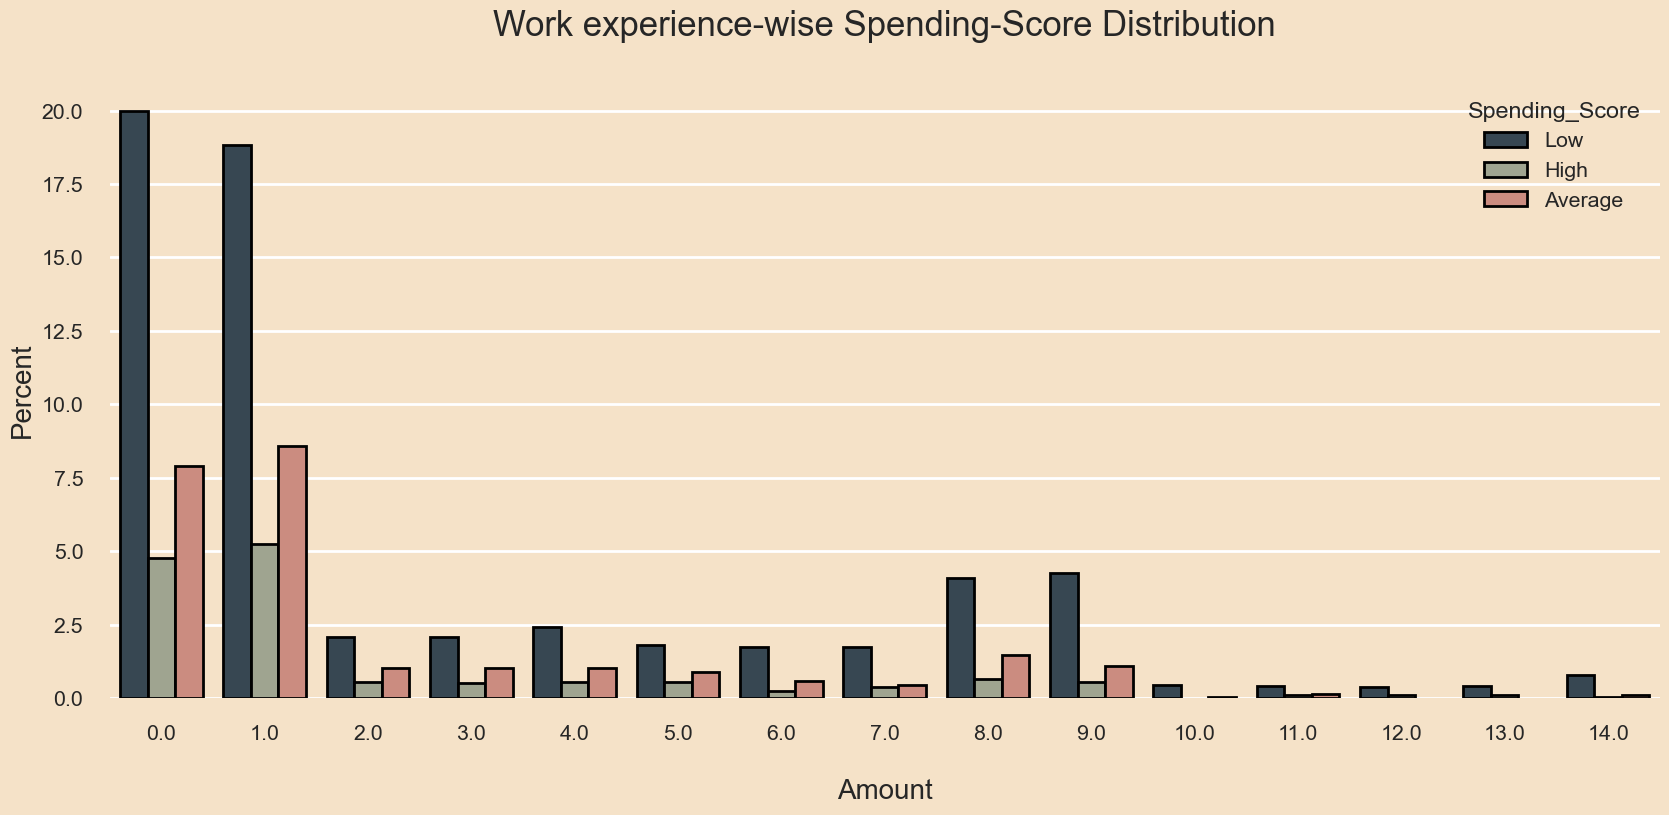

In [98]:
print(f"Let's have a look on the distribution of customer's spending on basis of work experience:")

plt.subplots(figsize=(20, 8))

sns.countplot(data, x="Work_Experience", hue="Spending_Score", palette=["#324856","#A1A78D","#D88373"],edgecolor="black", stat='percent')
plt.ylabel("Percent",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)
plt.title("Work experience-wise Spending-Score Distribution\n",fontsize=25)

plt.show()

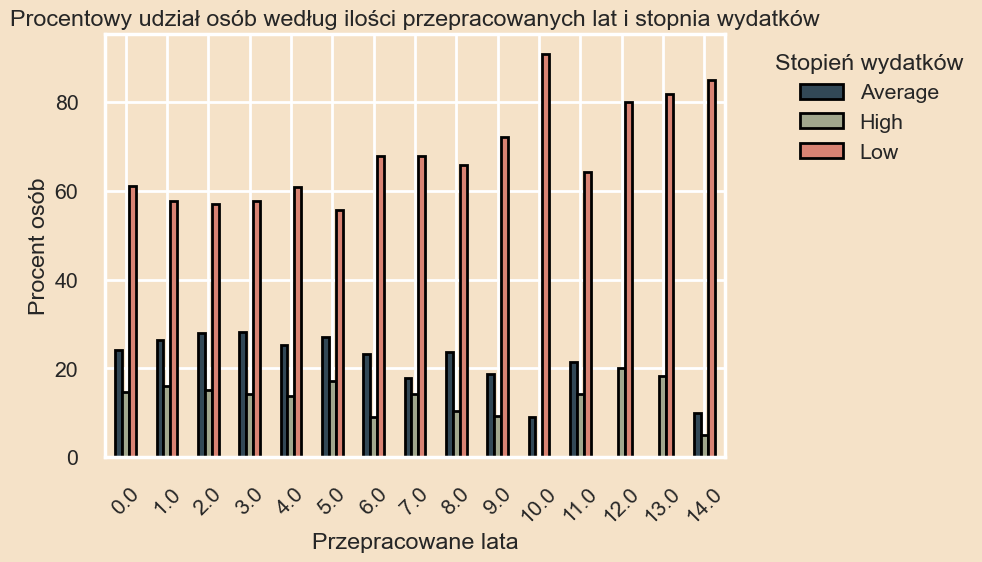

'ogólnie to tutaj mamy przedstawione ile % osob które przepracowały x la wydaje dużo, średnio i mało. \nKażdy x z przepracowanych lat to osobnbe 100%'

In [99]:

grouped = data.groupby(['Work_Experience', 'Spending_Score']).size().unstack()
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
# Tworzenie wykresu
percentages.plot(kind='bar', color=["#324856","#A1A78D","#D88373"],edgecolor="black")
plt.title('Procentowy udział osób według ilości przepracowanych lat i stopnia wydatków')
plt.xlabel('Przepracowane lata')
plt.ylabel('Procent osób')
plt.legend(title='Stopień wydatków', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
'''ogólnie to tutaj mamy przedstawione ile % osob które przepracowały x la wydaje dużo, średnio i mało. 
Każdy x z przepracowanych lat to osobnbe 100%'''

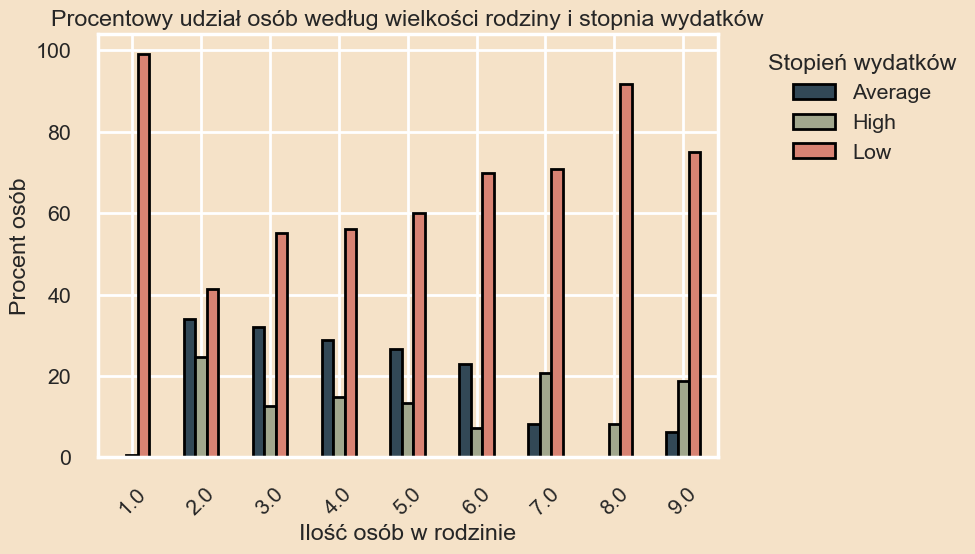

'ogólnie to tutaj mamy przedstawione ile % osob które mają rodzinę na x osob wydaje dużo, średnio i mało. \nKażdy x z wielkości rodziny to osobnbe 100%'

In [100]:
grouped = data.groupby(['Family_Size', 'Spending_Score']).size().unstack()
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Tworzenie wykresu
percentages.plot(kind='bar', color=["#324856","#A1A78D","#D88373"],edgecolor="black")
plt.title('Procentowy udział osób według wielkości rodziny i stopnia wydatków')
plt.xlabel('Ilość osób w rodzinie')
plt.ylabel('Procent osób')
plt.legend(title='Stopień wydatków', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
'''ogólnie to tutaj mamy przedstawione ile % osob które mają rodzinę na x osob wydaje dużo, średnio i mało. 
Każdy x z wielkości rodziny to osobnbe 100%'''

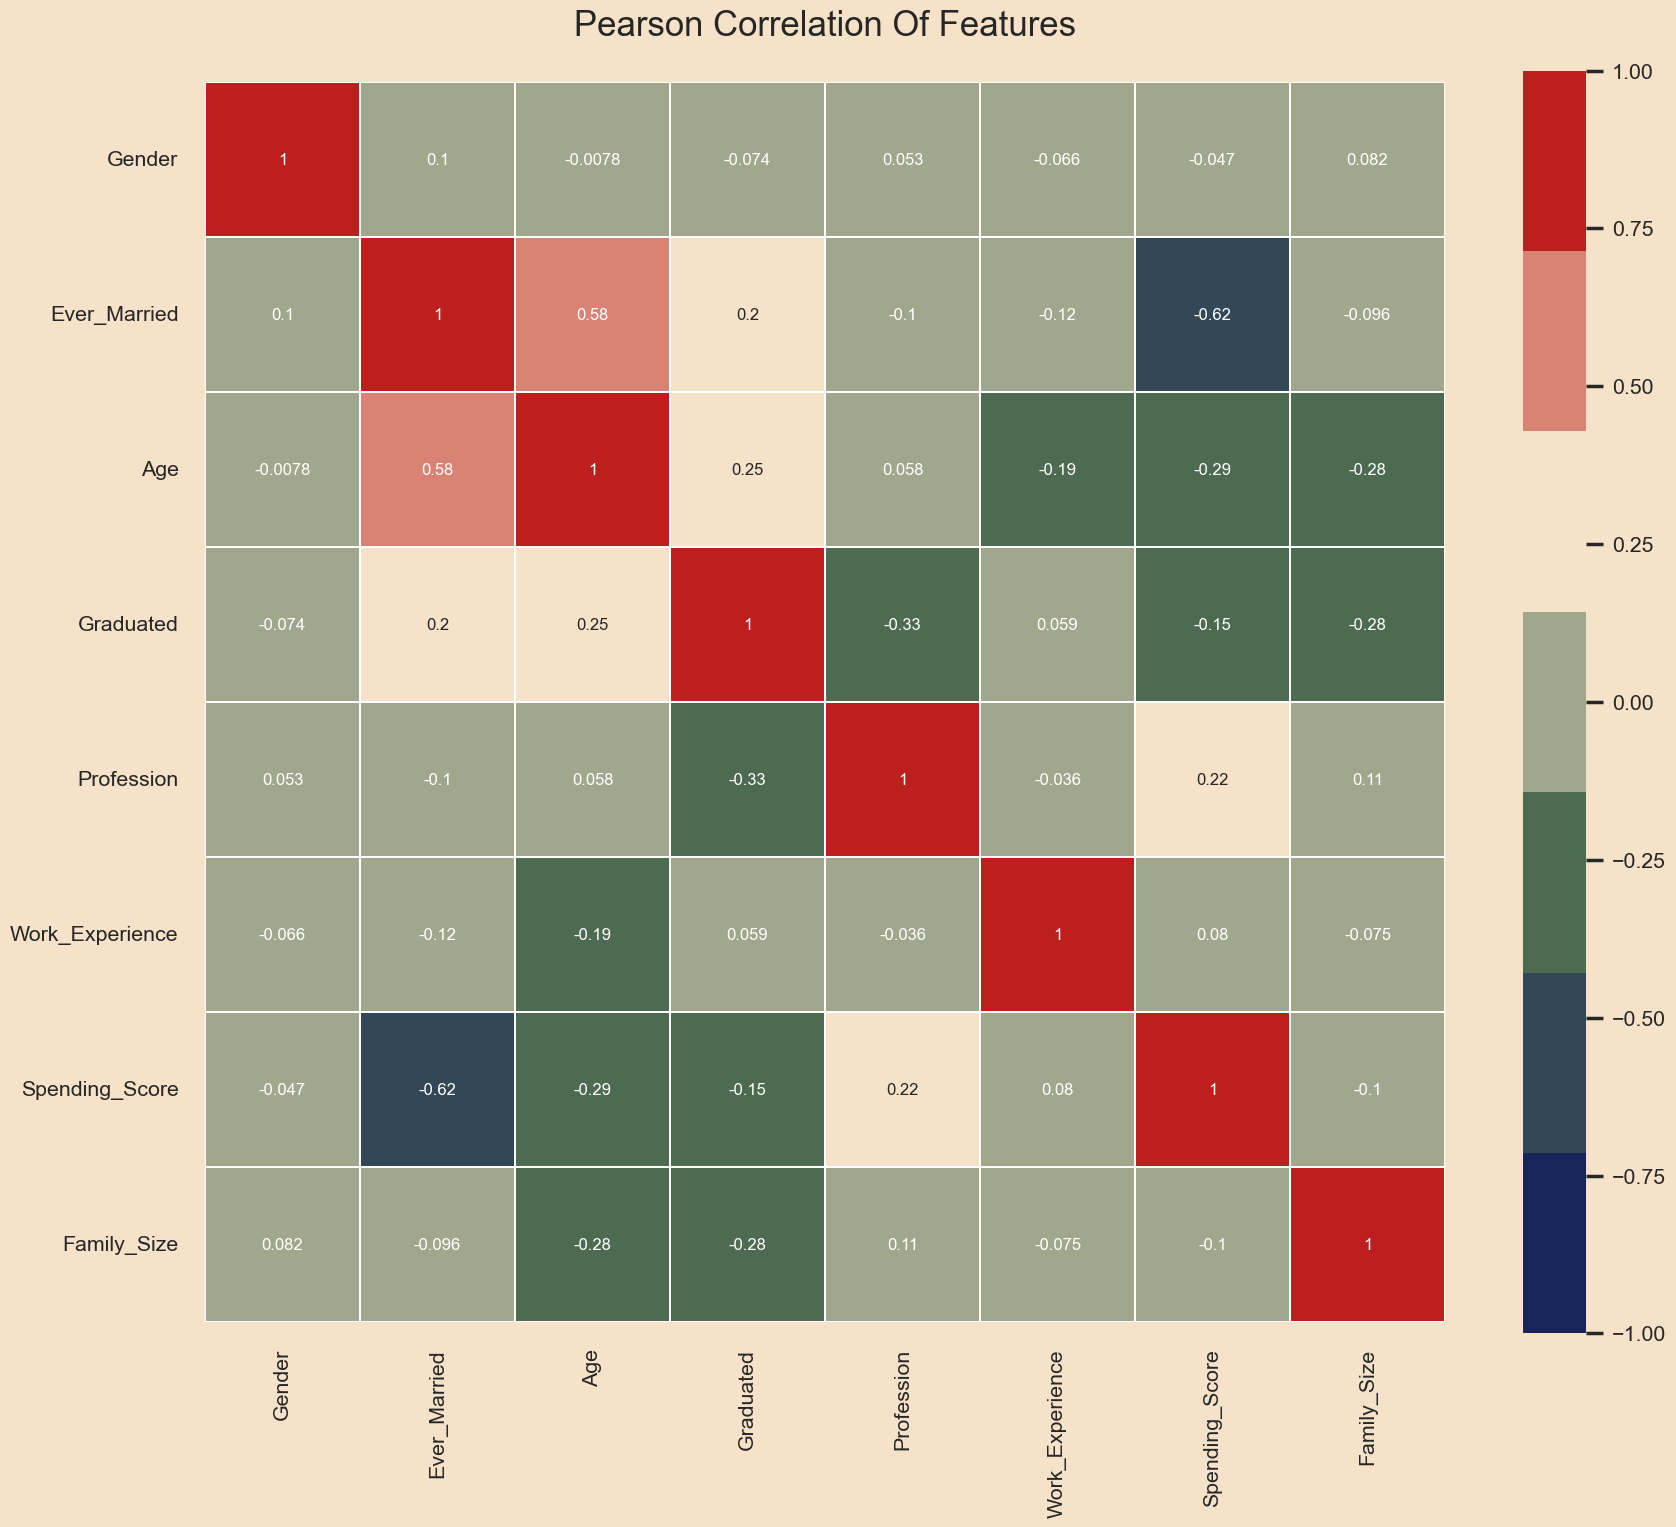

In [101]:
catcol = ["Graduated","Spending_Score", "Gender", "Ever_Married", "Profession"]
le = LabelEncoder()
for col in catcol:
        data[col] = le.fit_transform(data[col])


plt.subplots(figsize =(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [102]:
new_df = new_df.drop(columns='ID')
dataC = new_df.copy()
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns=new_df.columns)
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head().style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

After scaling, let's have a glimpse of the scaled dataset :


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-1.100531,0.832841,-0.443525,0.777064,-0.288541,-0.764205,0.741155,-1.175566
1,0.908653,0.832841,-0.383829,0.777064,0.879567,1.623371,-1.617114,0.741845
2,0.908653,0.832841,0.929478,-1.286895,0.490198,2.518712,-0.437980,-0.536429
3,0.908653,0.832841,0.213129,0.777064,-0.677910,-0.764205,-0.437980,1.380982
4,0.908653,0.832841,1.048870,0.777064,-0.677910,0.728030,0.741155,0.102708


In [103]:
scaled_dataC = scaled_data.copy()
pca = PCA(n_components=2, random_state=42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1", "col2"])

print("Let's have a glimpse of the PCA transformed dataset :")
pca_data.head(15).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

Let's have a glimpse of the PCA transformed dataset :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
col1,-0.539679,-0.783721,-0.408151,-1.022925,-0.961711,-1.828847,-1.799218,2.403431,2.183943,2.626180,-1.705745,2.334786,1.976416,-1.441595,-0.460594
col2,-1.173941,0.586075,0.299638,0.947988,-0.431989,-0.359031,0.559365,1.335134,1.045878,1.256556,0.978556,0.170707,0.400819,-1.343489,0.577178


Let's have a look on the dataset after dimensionality reduction :


<Axes: xlabel='col1', ylabel='col2'>

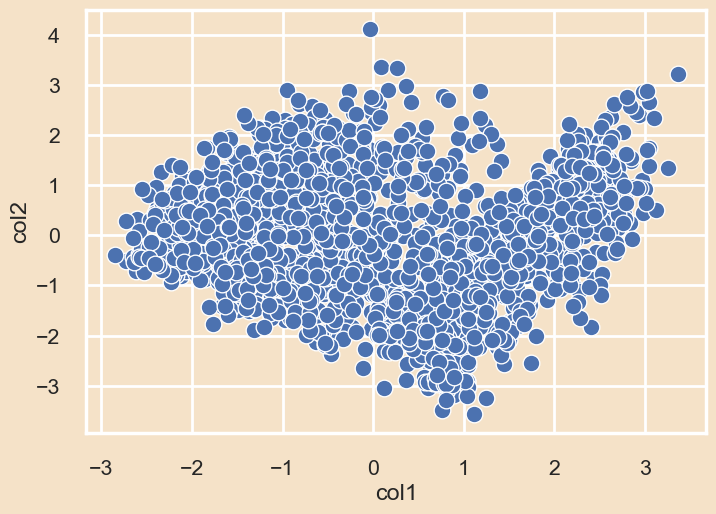

In [104]:
x = pca_data["col1"]
y = pca_data["col2"]

print(f"Let's have a look on the dataset after dimensionality reduction :")

sns.scatterplot(data=pca_data, x="col1", y="col2", palette=cluster[0])

Elbow Method for determining the number of clusters :


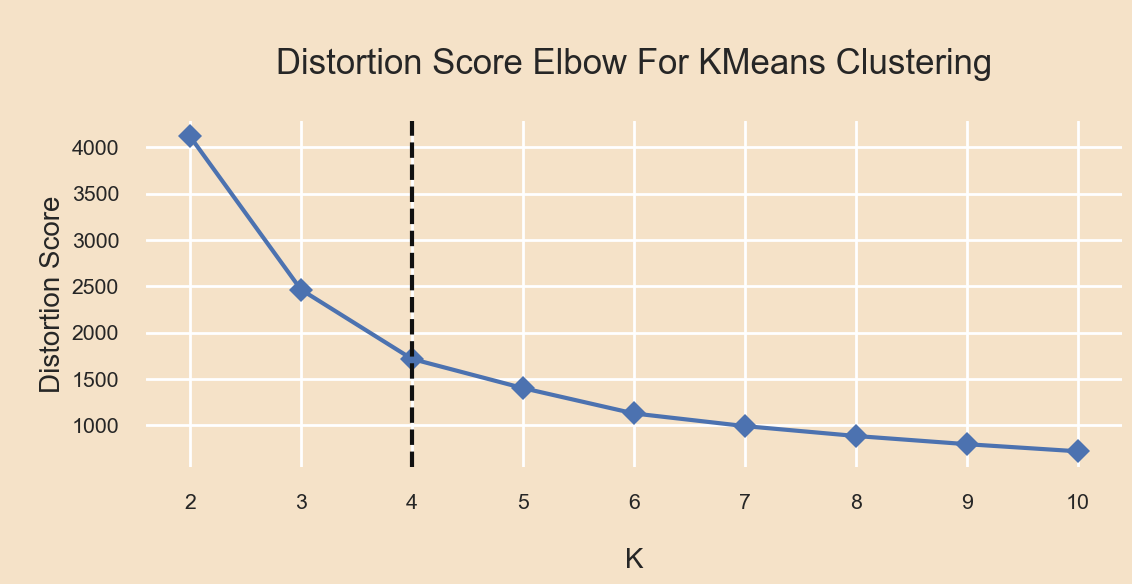

In [105]:
print("Elbow Method for determining the number of clusters :")
_, axes = plt.subplots(figsize=(20, 8))

elbow = KElbowVisualizer(
    KMeans(), k=10, timings=False, locate_elbow=True, size=(1260, 450)
)
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n", fontsize=25)
axes.set_xlabel("\nK", fontsize=20)
axes.set_ylabel("\nDistortion Score", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [106]:
km = KMeans(n_clusters=4, random_state=42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
new_df["Clusters"] = y_km

new_df.head(15).T.style.set_properties(
    **{"background-color": "#F5E2C8", "color": "#324856", "border": "1.5px solid black"}
)

,0,1,3,5,6,7,8,9,10,11,12,13,14,15,16
Gender,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
Ever_Married,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
Age,36.000000,37.000000,59.000000,47.000000,61.000000,47.000000,50.000000,19.000000,22.000000,22.000000,50.000000,27.000000,18.000000,61.000000,20.000000
Graduated,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
Profession,2.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,5.000000,1.000000,0.000000,7.000000
Work_Experience,0.000000,8.000000,11.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,1.000000
Spending_Score,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000
Family_Size,1.000000,4.000000,2.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,6.000000,5.000000,3.000000,3.000000,1.000000,3.000000
Clusters,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000


Let's have a look on the customers quantity distribution after clustering :


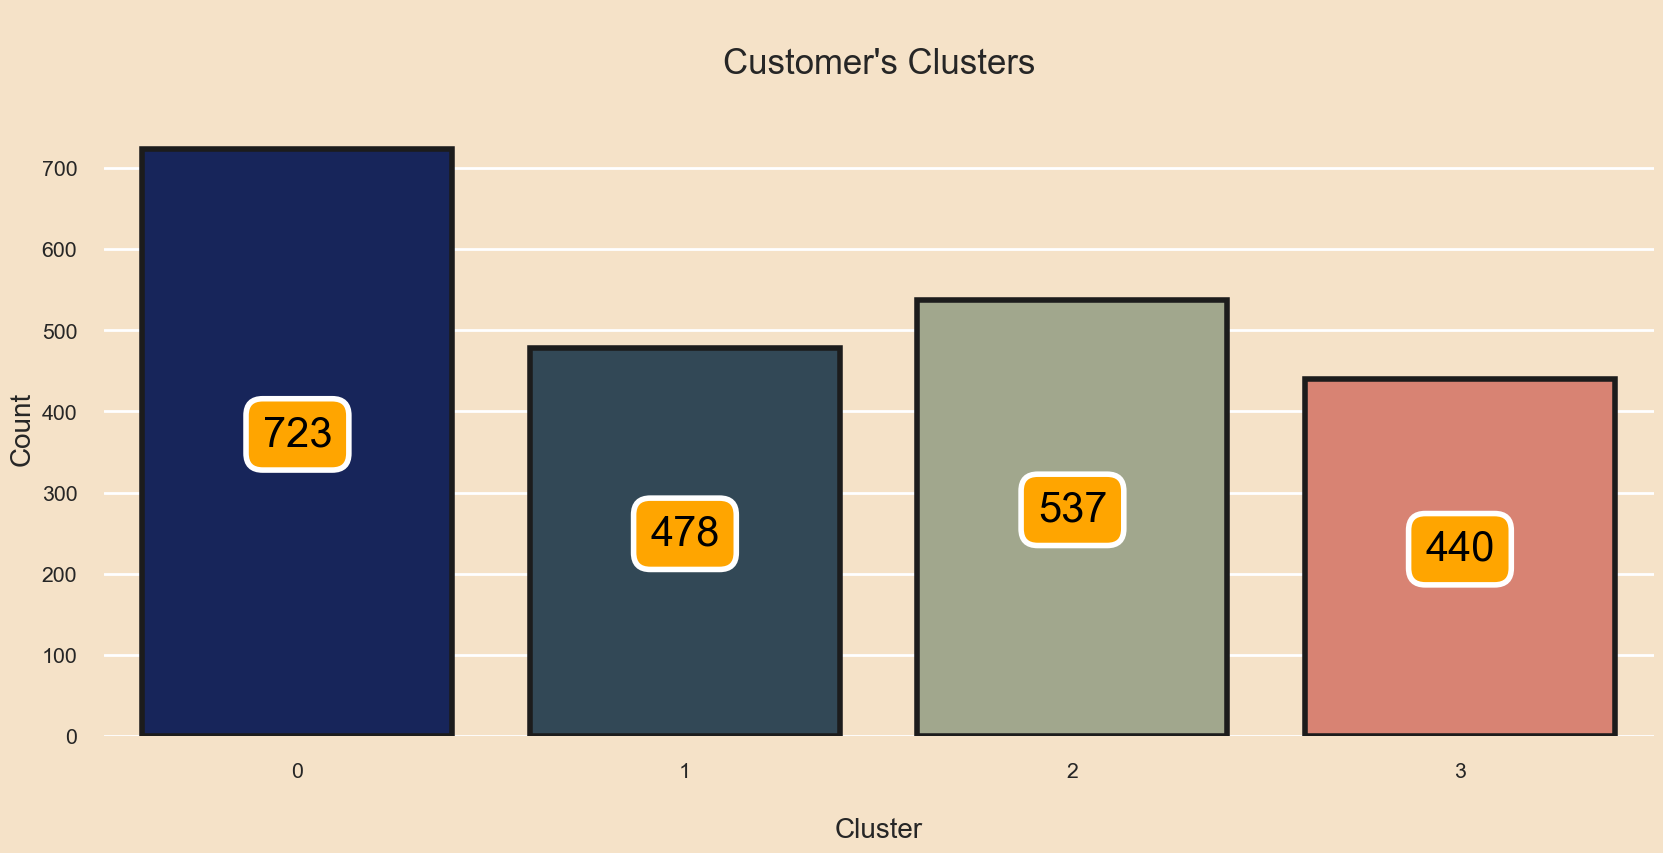

In [107]:
print("Let's have a look on the customers quantity distribution after clustering :")

plt.subplots(figsize=(20, 8))
p = sns.countplot(
    x=new_df["Clusters"],
    palette=cluster,
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=4,
)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n", fontsize=25)
p.axes.set_ylabel("Count", fontsize=20)
p.axes.set_xlabel("\nCluster", fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0)
for container in p.containers:
    p.bar_label(
        container,
        label_type="center",
        padding=6,
        size=30,
        color="black",
        rotation=0,
        bbox={
            "boxstyle": "round",
            "pad": 0.4,
            "facecolor": "orange",
            "edgecolor": "white",
            "linewidth": 4,
            "alpha": 1,
        },
    )


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the dataset after clustering :


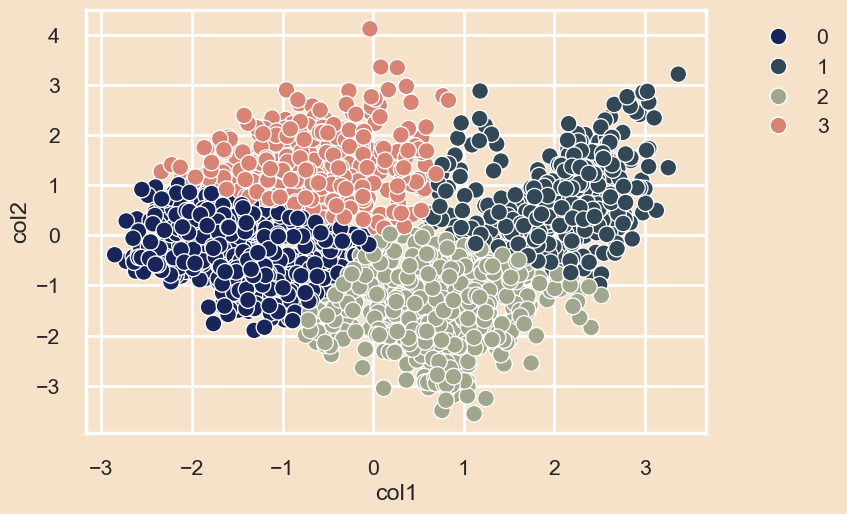

In [108]:
print(f"Let's have a look on the dataset after clustering :")

sns.scatterplot(data=pca_data, x="col1", y="col2", palette=cluster, hue="Clusters")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

In [109]:
def cluster_f(feature):

    _, axes = plt.subplots(figsize=(20, 8))
    p = sns.countplot(
        x=new_df[feature],
        hue=new_df["Clusters"],
        palette=cluster,
        saturation=1,
        edgecolor="#1c1c1c",
        linewidth=2,
    )
    axes.set_title(f"\nClustering Profile On {feature}\n", fontsize=25)
    # axes.set_ylabel("Spending", fontsize=20)
    axes.set_xlabel(f"\n{feature}", fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()
    
def cluster_odwrotnie(feature,title):
    
    _, axes = plt.subplots(figsize=(20, 8))
    p = sns.countplot(
        x=new_df['Clusters'],
        hue=new_df[feature],
        palette=palette,
        saturation=1,
        edgecolor="#1c1c1c",
        linewidth=2,
    )
    axes.set_title(f"\nClustering Profile On {feature}\n", fontsize=25)
    # axes.set_ylabel("Spending", fontsize=20)
    axes.set_xlabel(f"\nKlaster", fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title=title)
    sns.despine(left=True, bottom=True)
    plt.show()

Let's have a look on the characteristics of the clusters on the basis of spending :


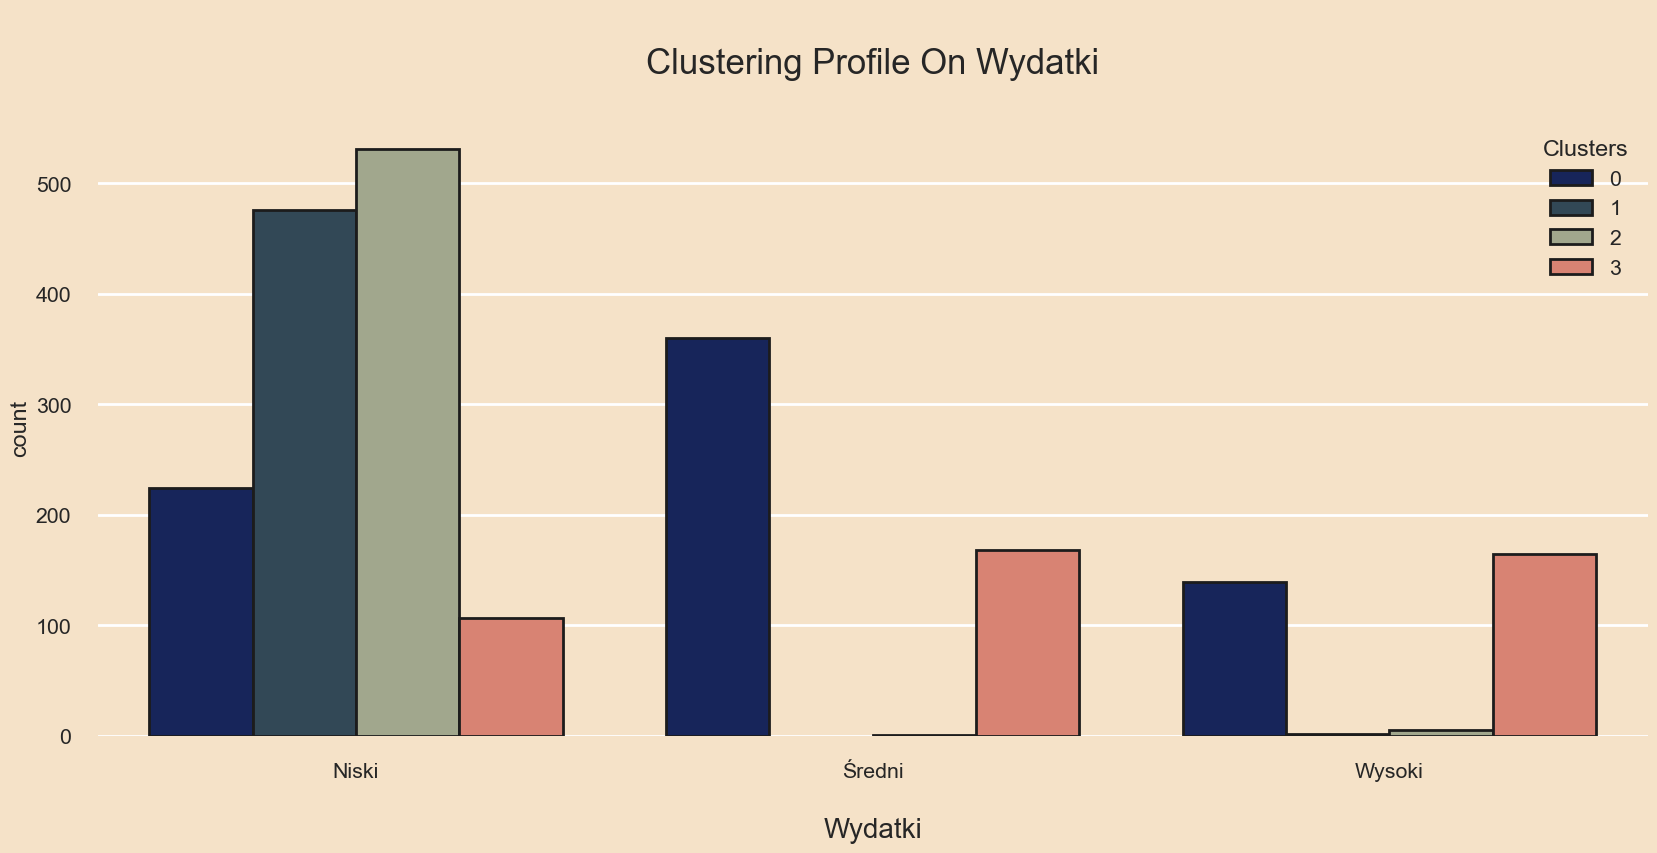

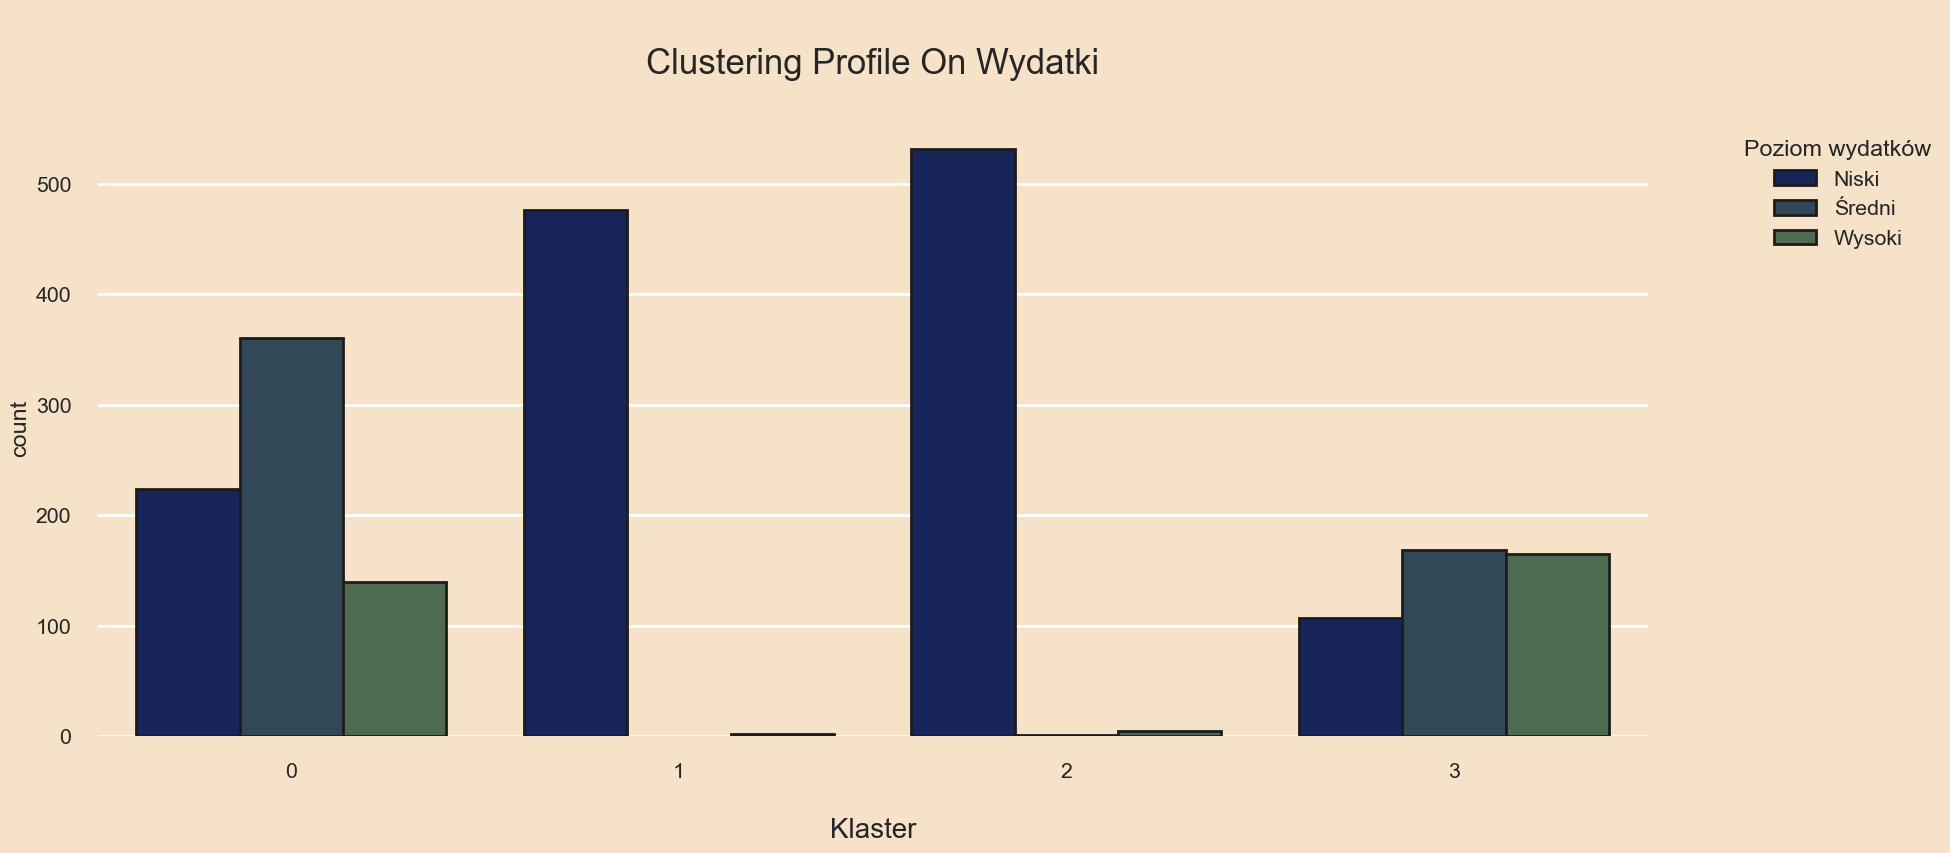

In [110]:
print(f"Let's have a look on the characteristics of the clusters on the basis of spending :")

mapowanie_wydatkow = {1: 'Wysoki', 0: 'Średni', 2: 'Niski'}
new_df['Wydatki'] = new_df['Spending_Score'].replace(mapowanie_wydatkow)
cluster_f("Wydatki")
cluster_odwrotnie("Wydatki", "Poziom wydatków")

Characteristics of clusters based on having childern :


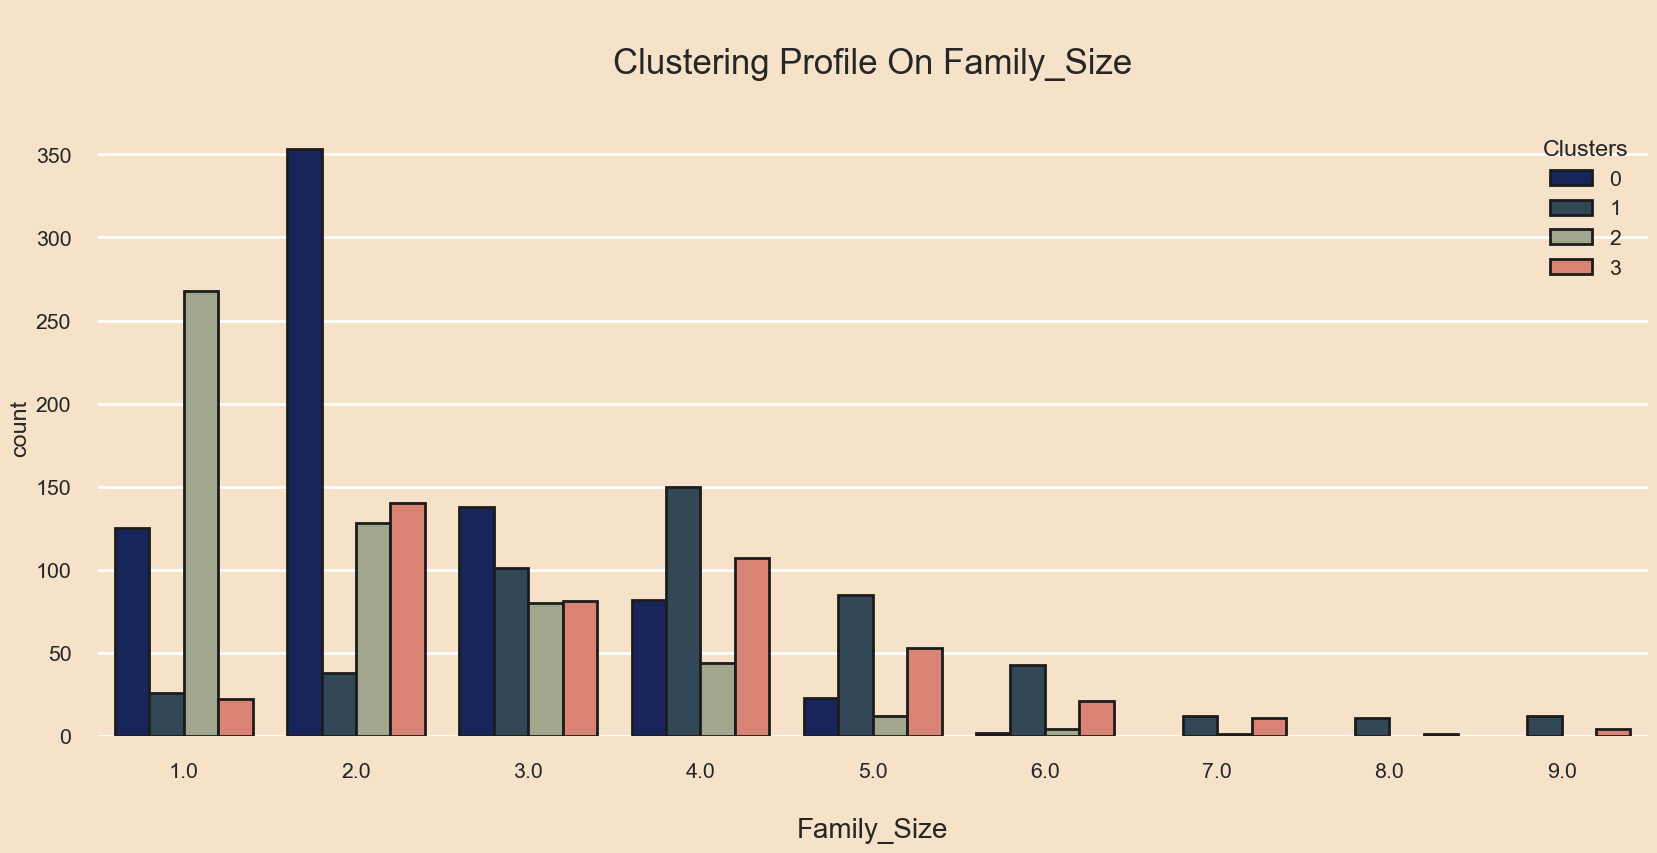

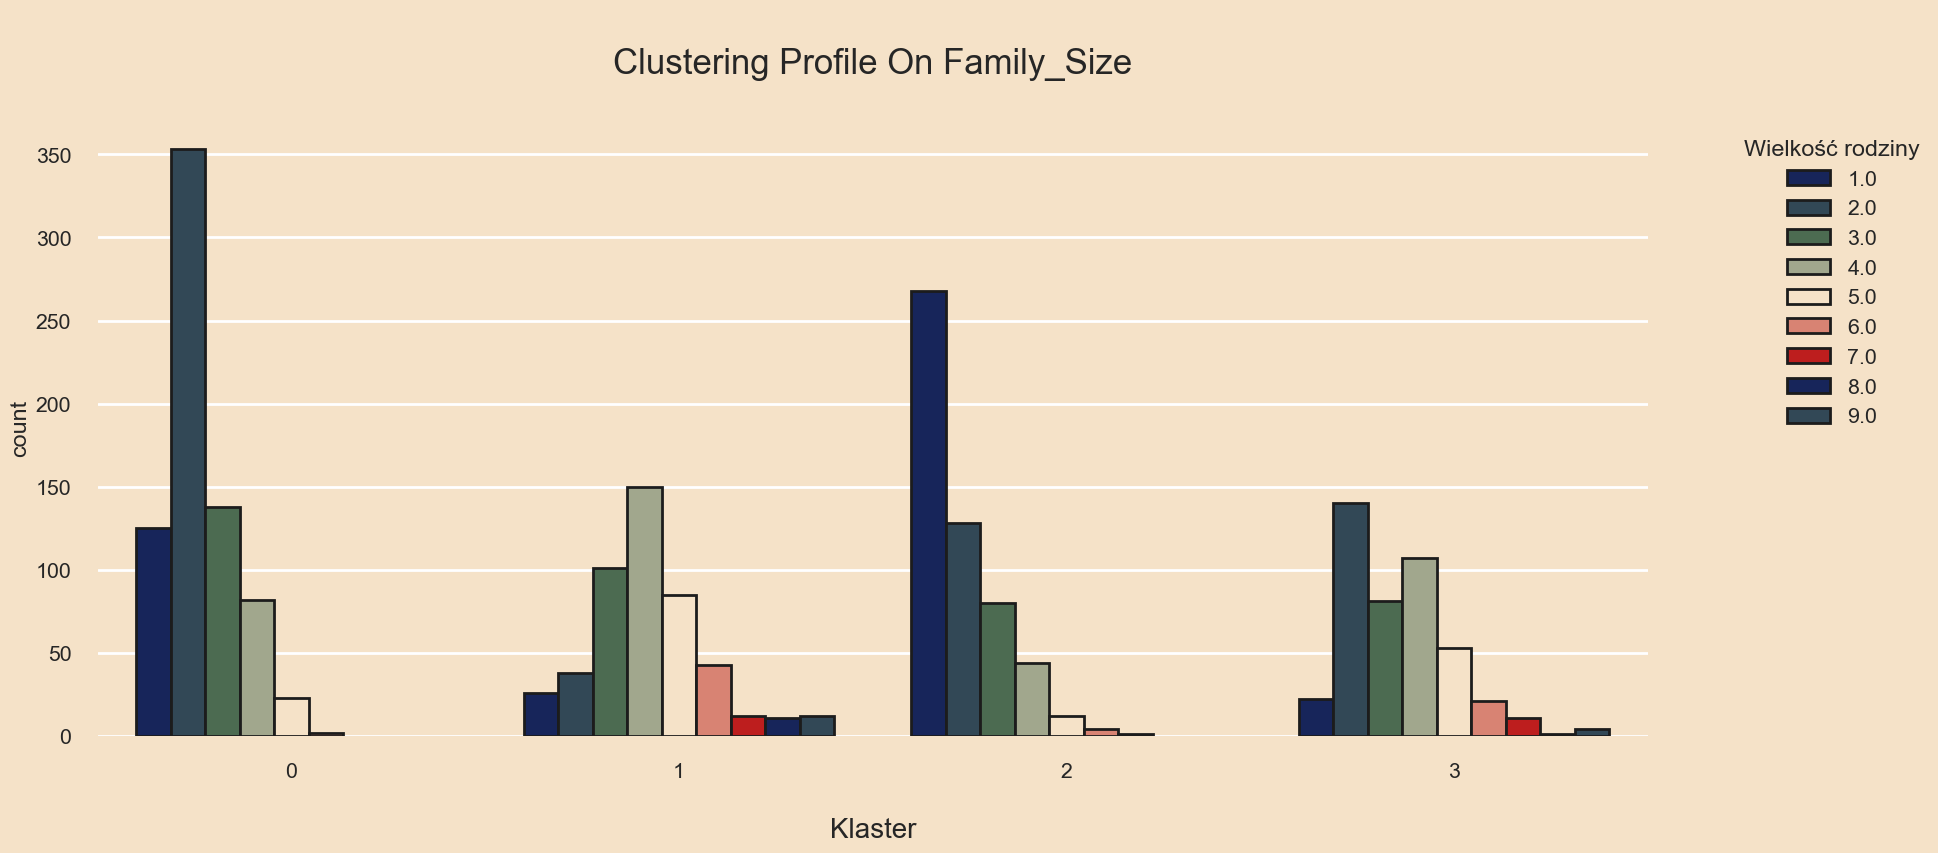

In [111]:
print(f"Characteristics of clusters based on having childern :")
cluster_f("Family_Size")
cluster_odwrotnie("Family_Size", "Wielkość rodziny")

Characteristics of clusters based on age :


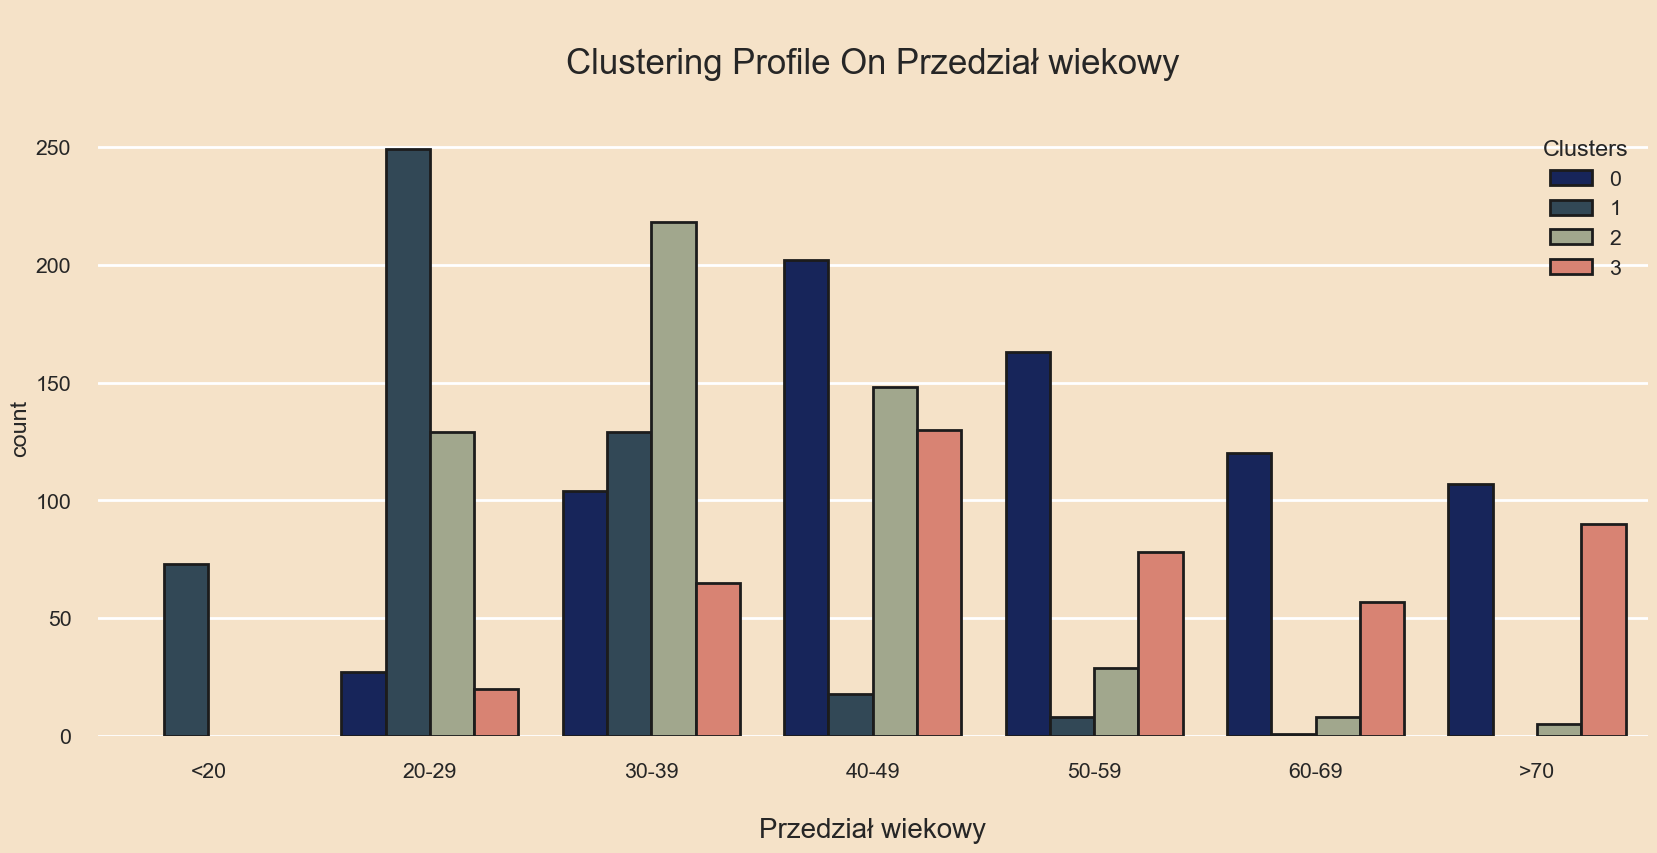

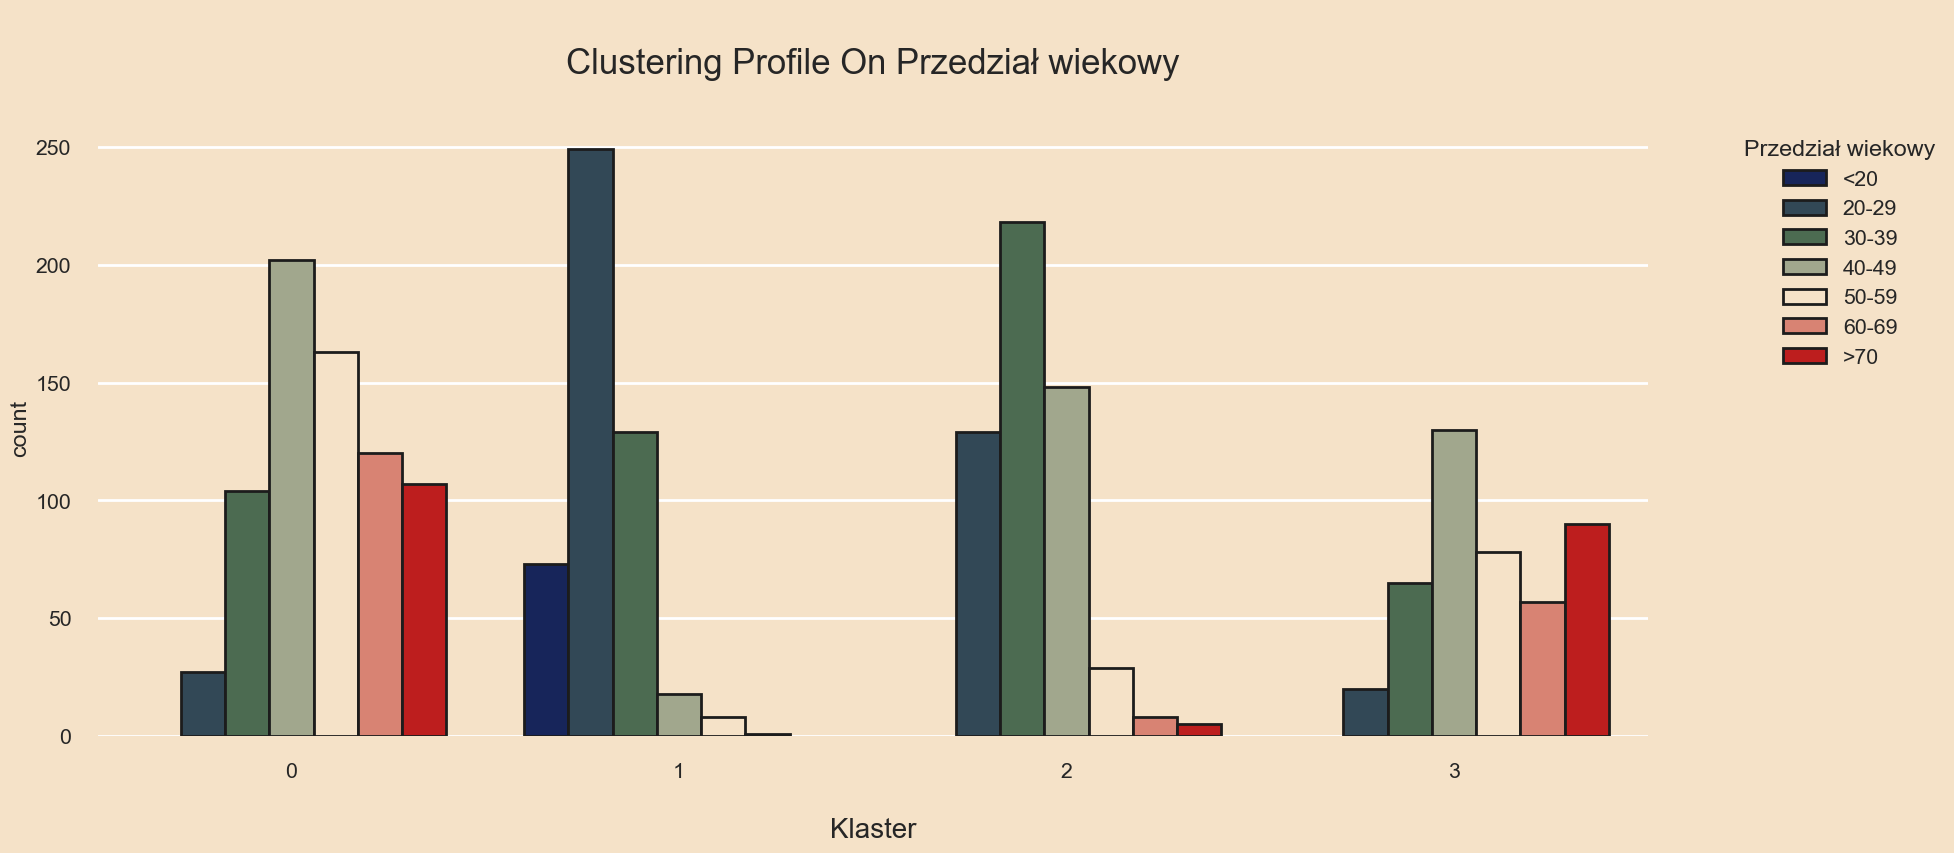

In [112]:
print(f"Characteristics of clusters based on age :")

# Definicja przedziałów wiekowych
bins = [0, 19, 29, 39, 49, 59, 69, 100]
labels = ['<20','20-29', '30-39', '40-49', '50-59', '60-69', '>70']

# Dodawanie nowej kolumny z podziałem wiekowym
new_df['Przedział wiekowy'] = pd.cut(new_df['Age'], bins=bins, labels=labels)

cluster_f("Przedział wiekowy")
cluster_odwrotnie("Przedział wiekowy", "Przedział wiekowy")

Characteristics of clusters based on education level :


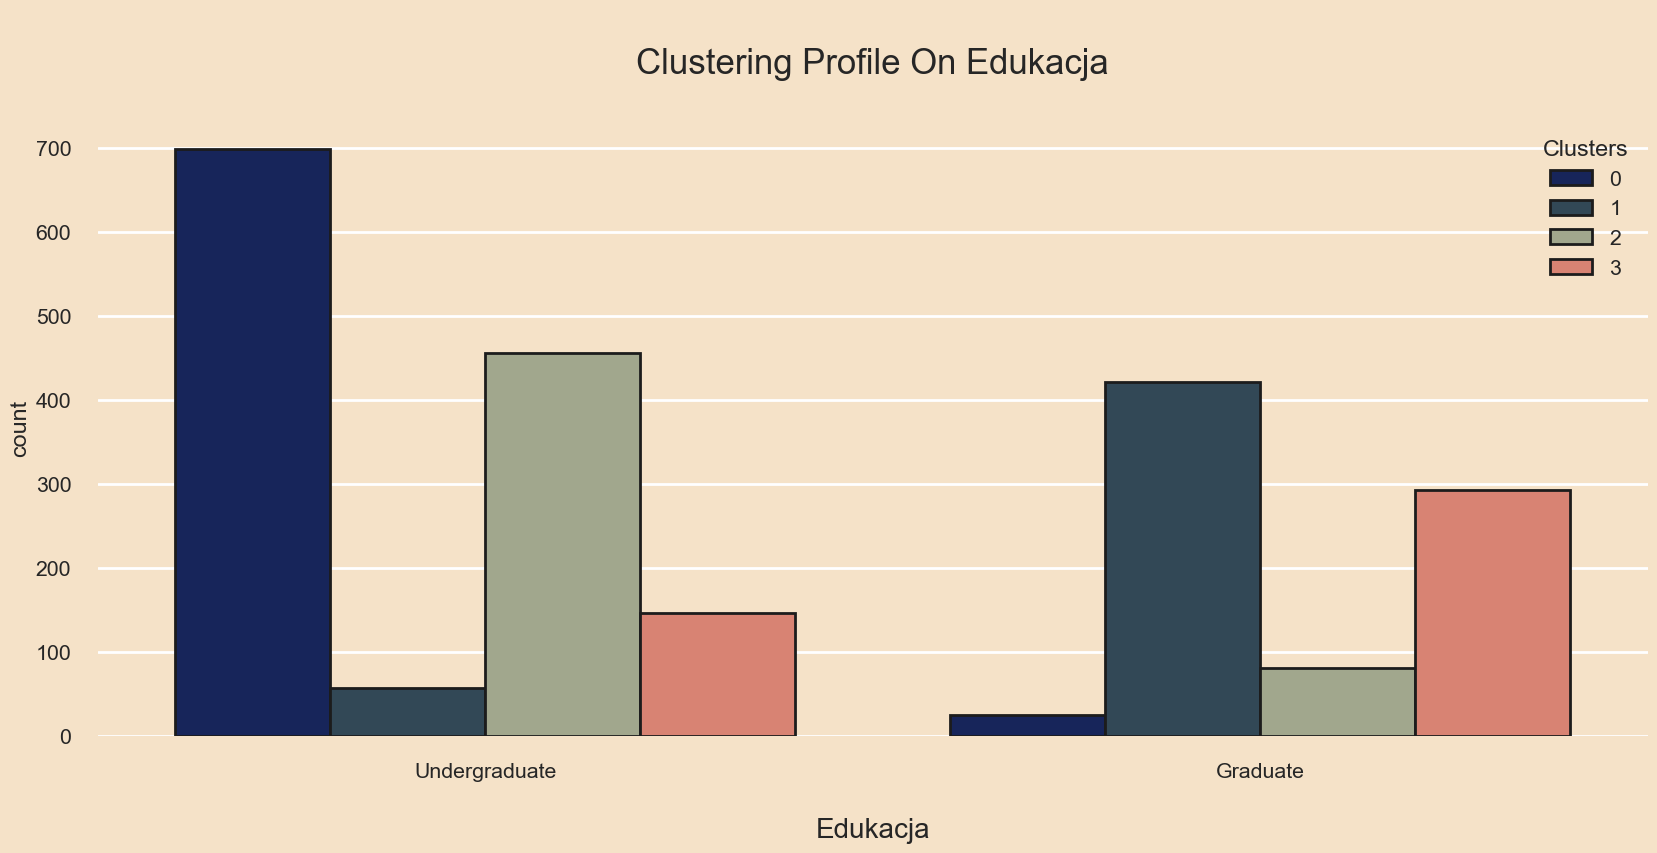

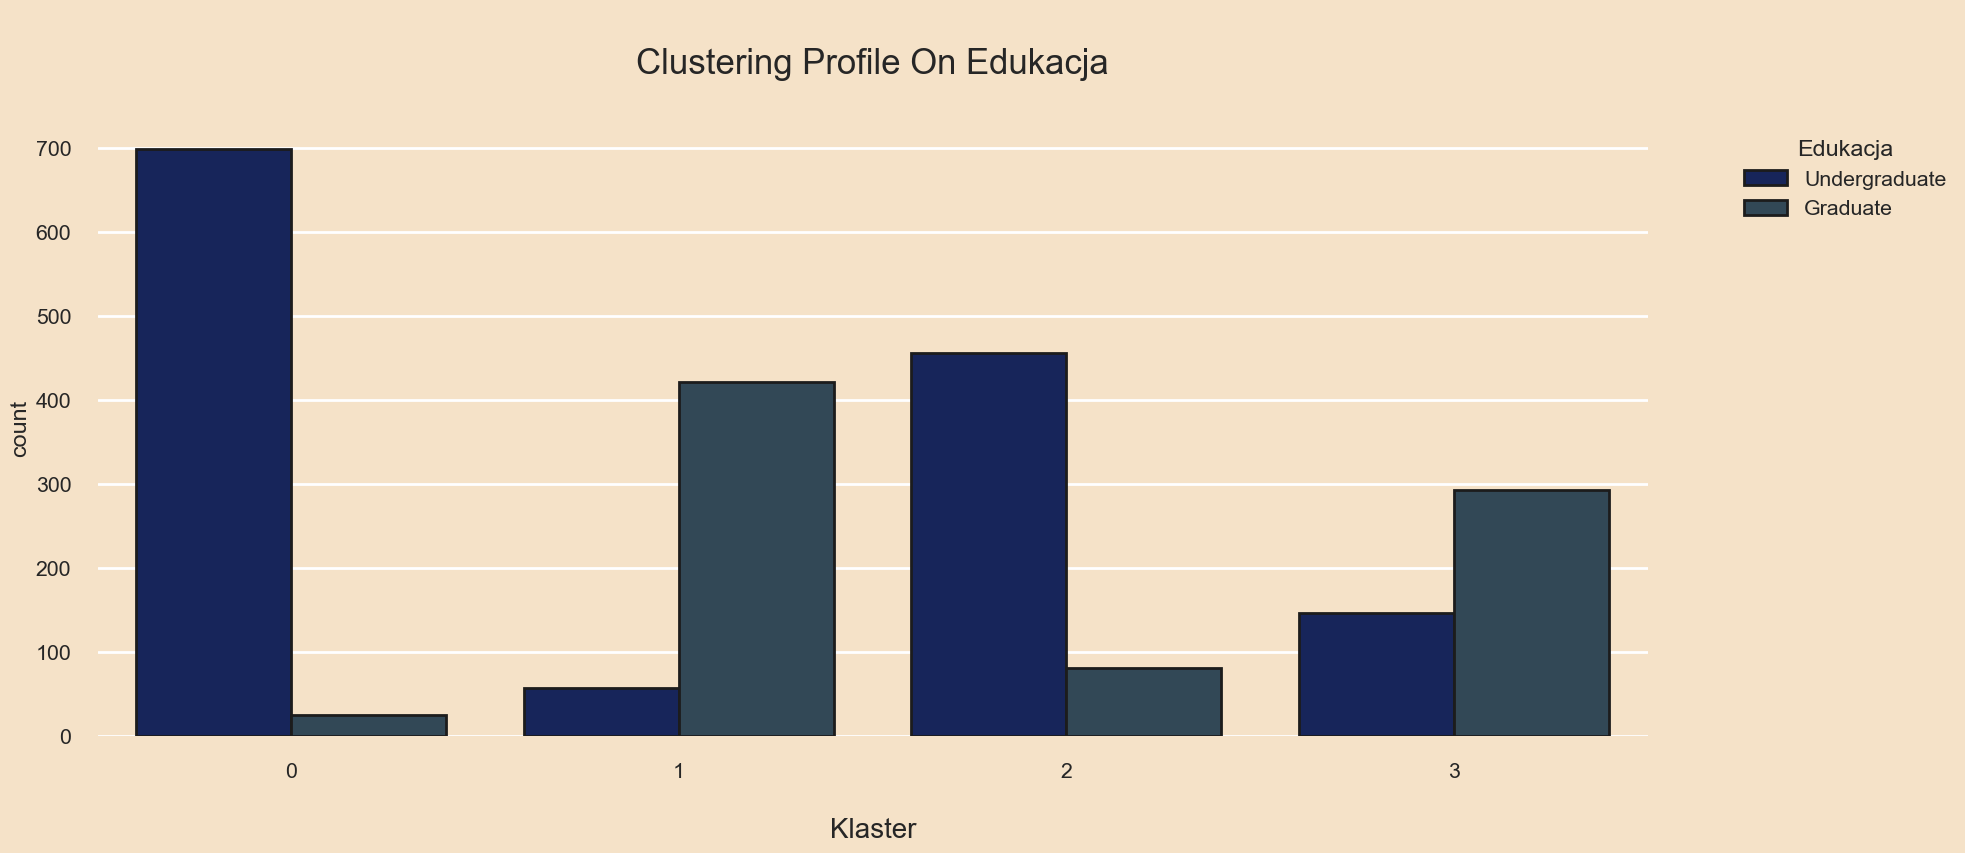

In [113]:
print(f"Characteristics of clusters based on education level :")

mapowanie_edukacji = {0: 'Graduate', 1: 'Undergraduate'}
new_df['Edukacja'] = new_df['Graduated'].replace(mapowanie_edukacji)
cluster_f("Edukacja")
cluster_odwrotnie("Edukacja", "Edukacja")

Characteristics of clusters based on marital status :


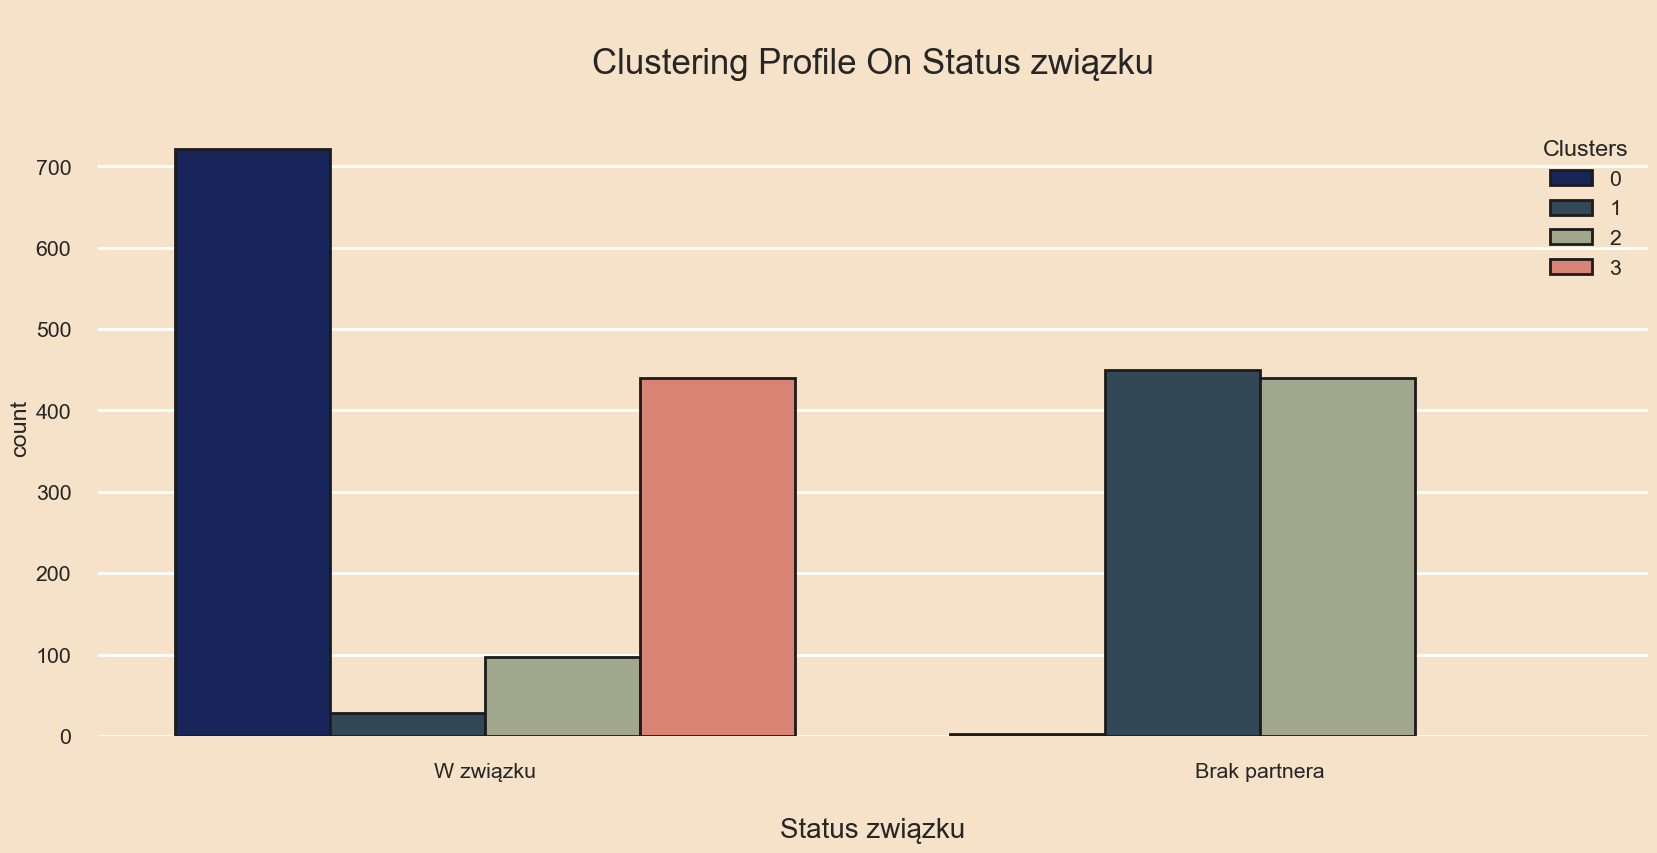

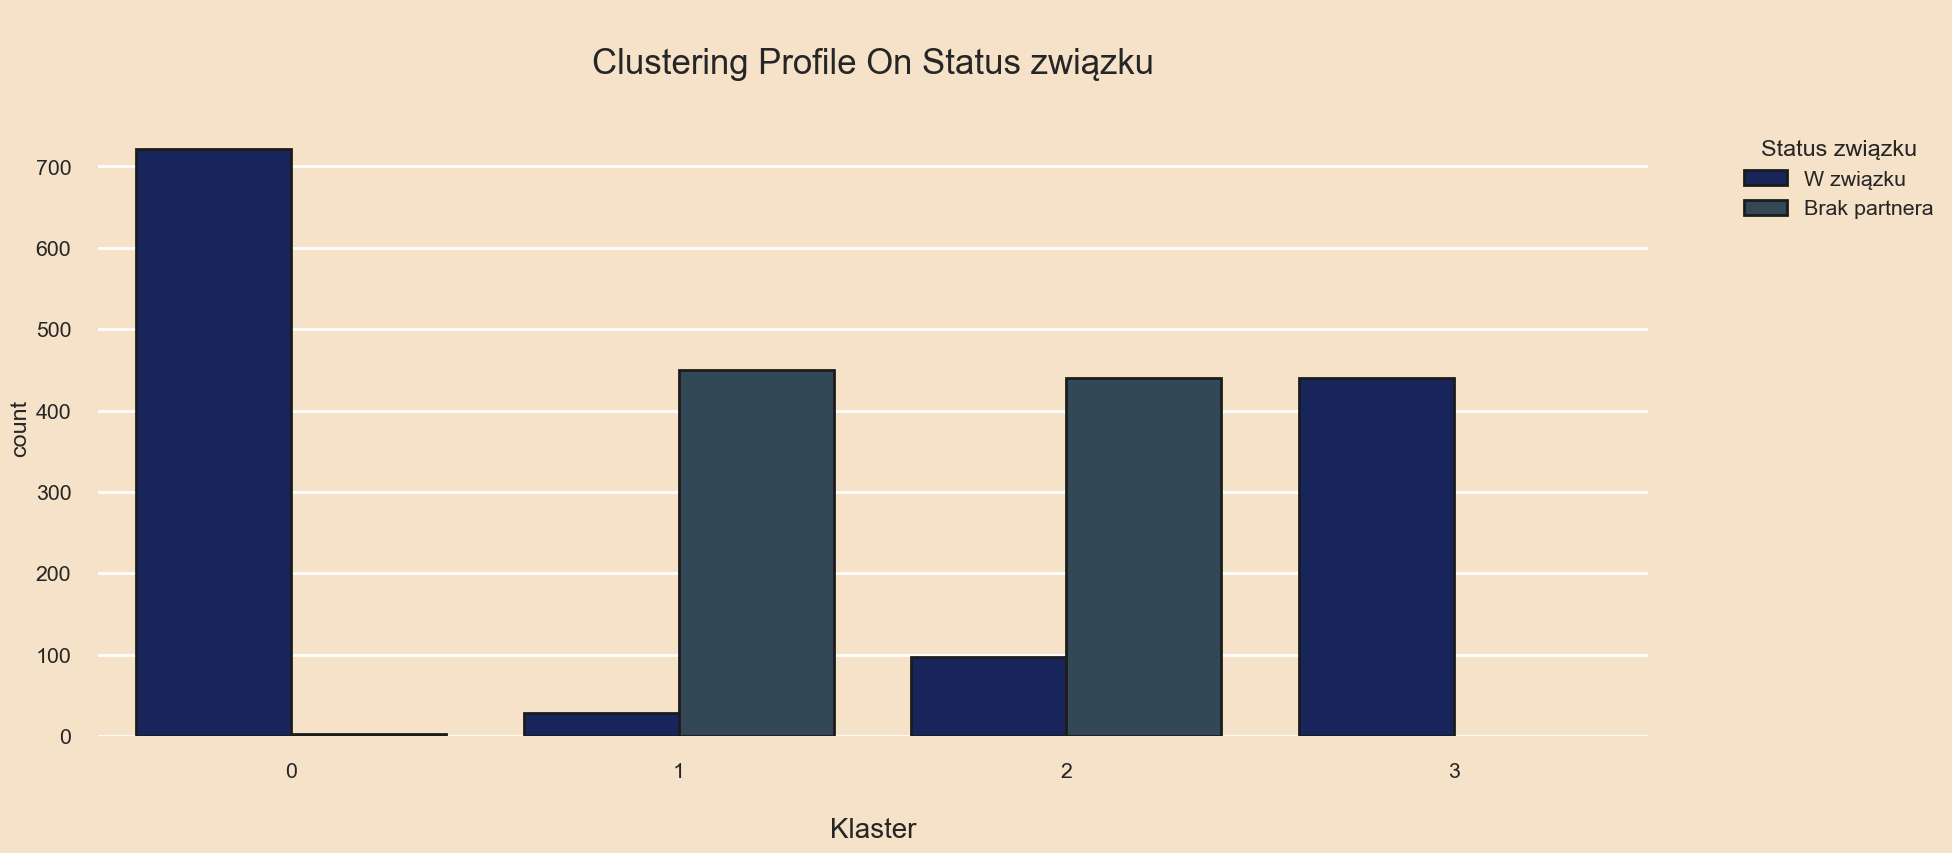

In [114]:
print(f"Characteristics of clusters based on marital status :")

mapowanie_cywil = {0: 'Brak partnera', 1: 'W związku'}
new_df['Status związku'] = new_df['Ever_Married'].replace(mapowanie_cywil)
cluster_f("Status związku")
cluster_odwrotnie("Status związku", "Status związku")

Characteristics of clusters based on profession :


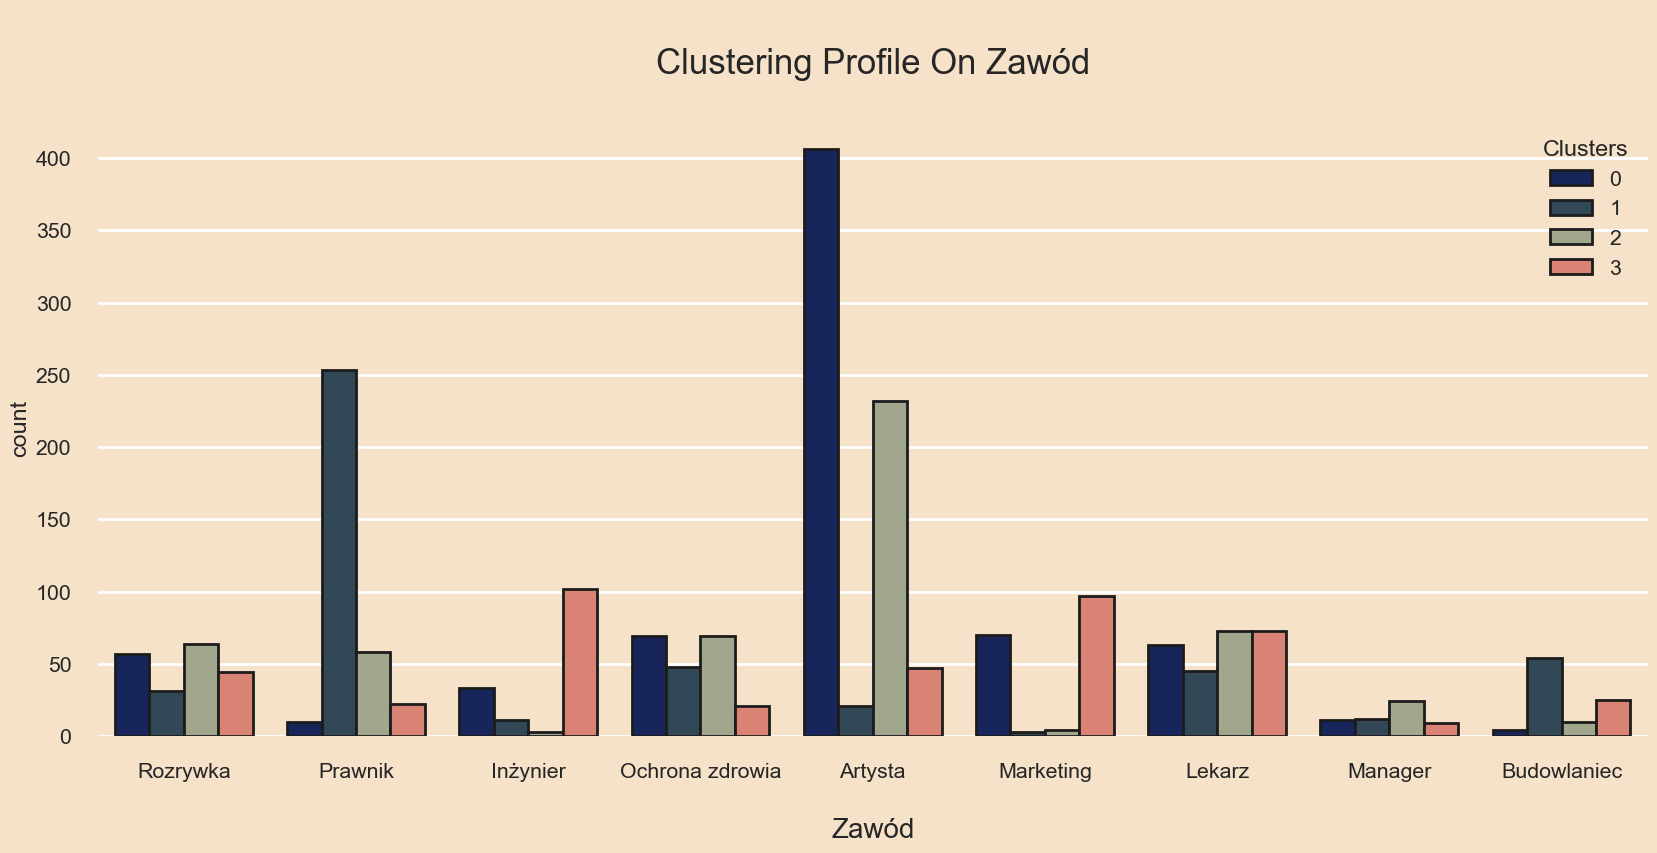

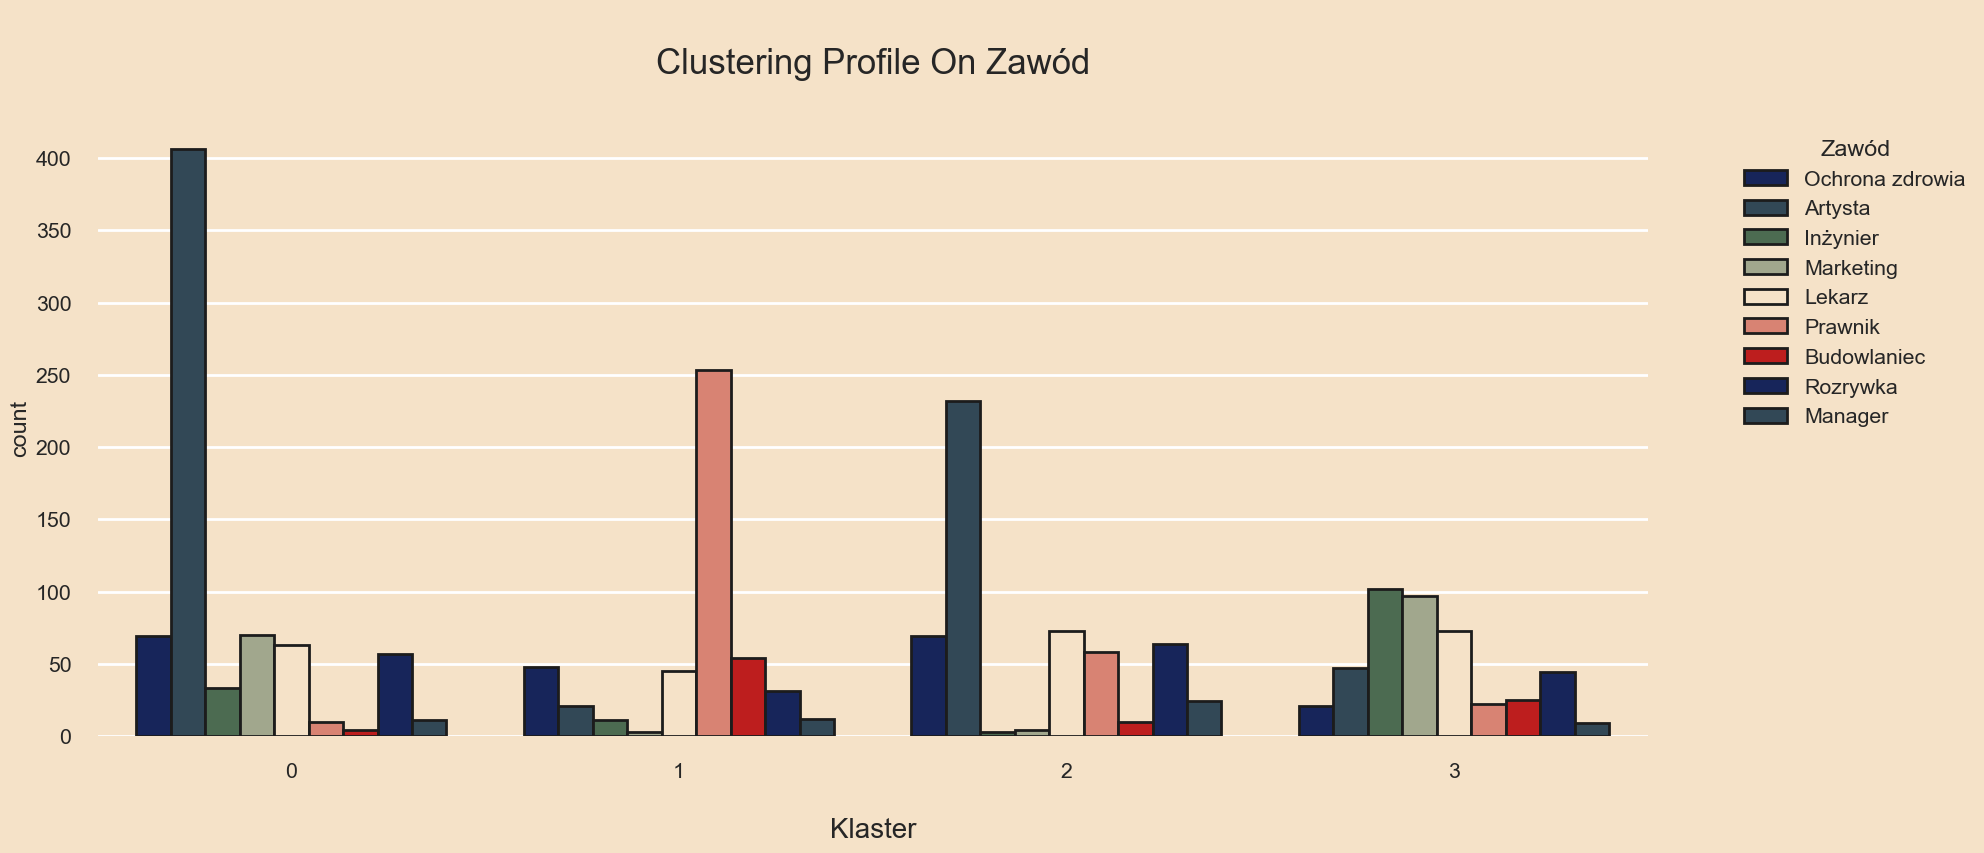

In [115]:
print(f"Characteristics of clusters based on profession :")

mapowanie_cywil = {0: 'Artysta', 1: 'Ochrona zdrowia', 2: 'Rozrywka', 3: 'Lekarz', 4:'Inżynier', 5:'Prawnik', 6:'Manager', 7:'Marketing', 8:'Budowlaniec'}
new_df['Zawód'] = new_df['Profession'].replace(mapowanie_cywil)
cluster_f("Zawód")
cluster_odwrotnie("Zawód", "Zawód")

Characteristics of clusters based on work experience :


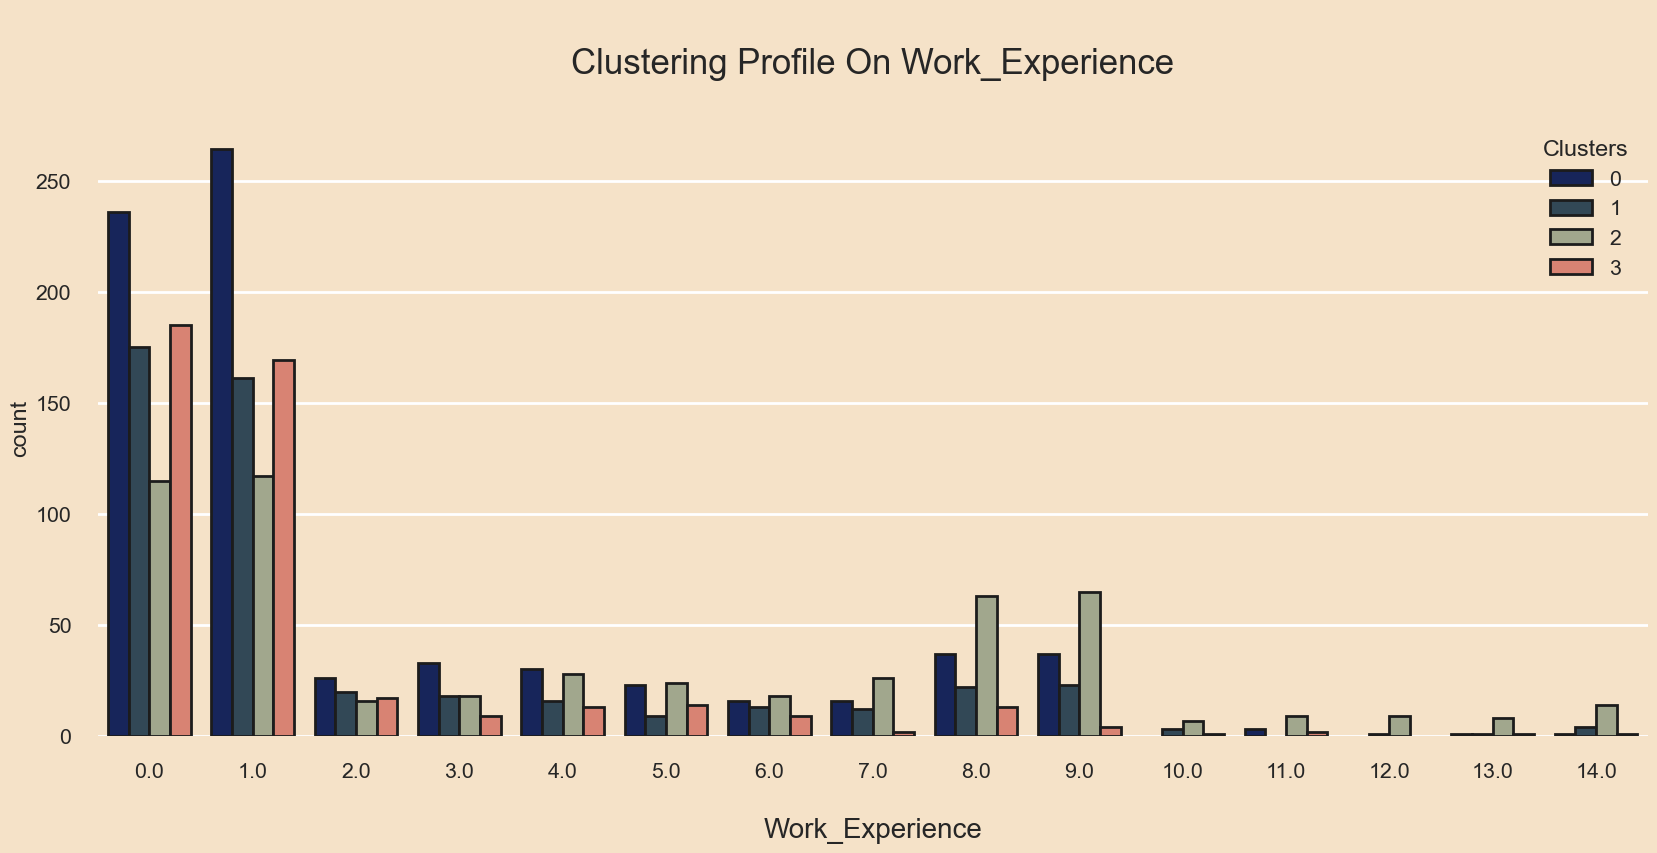

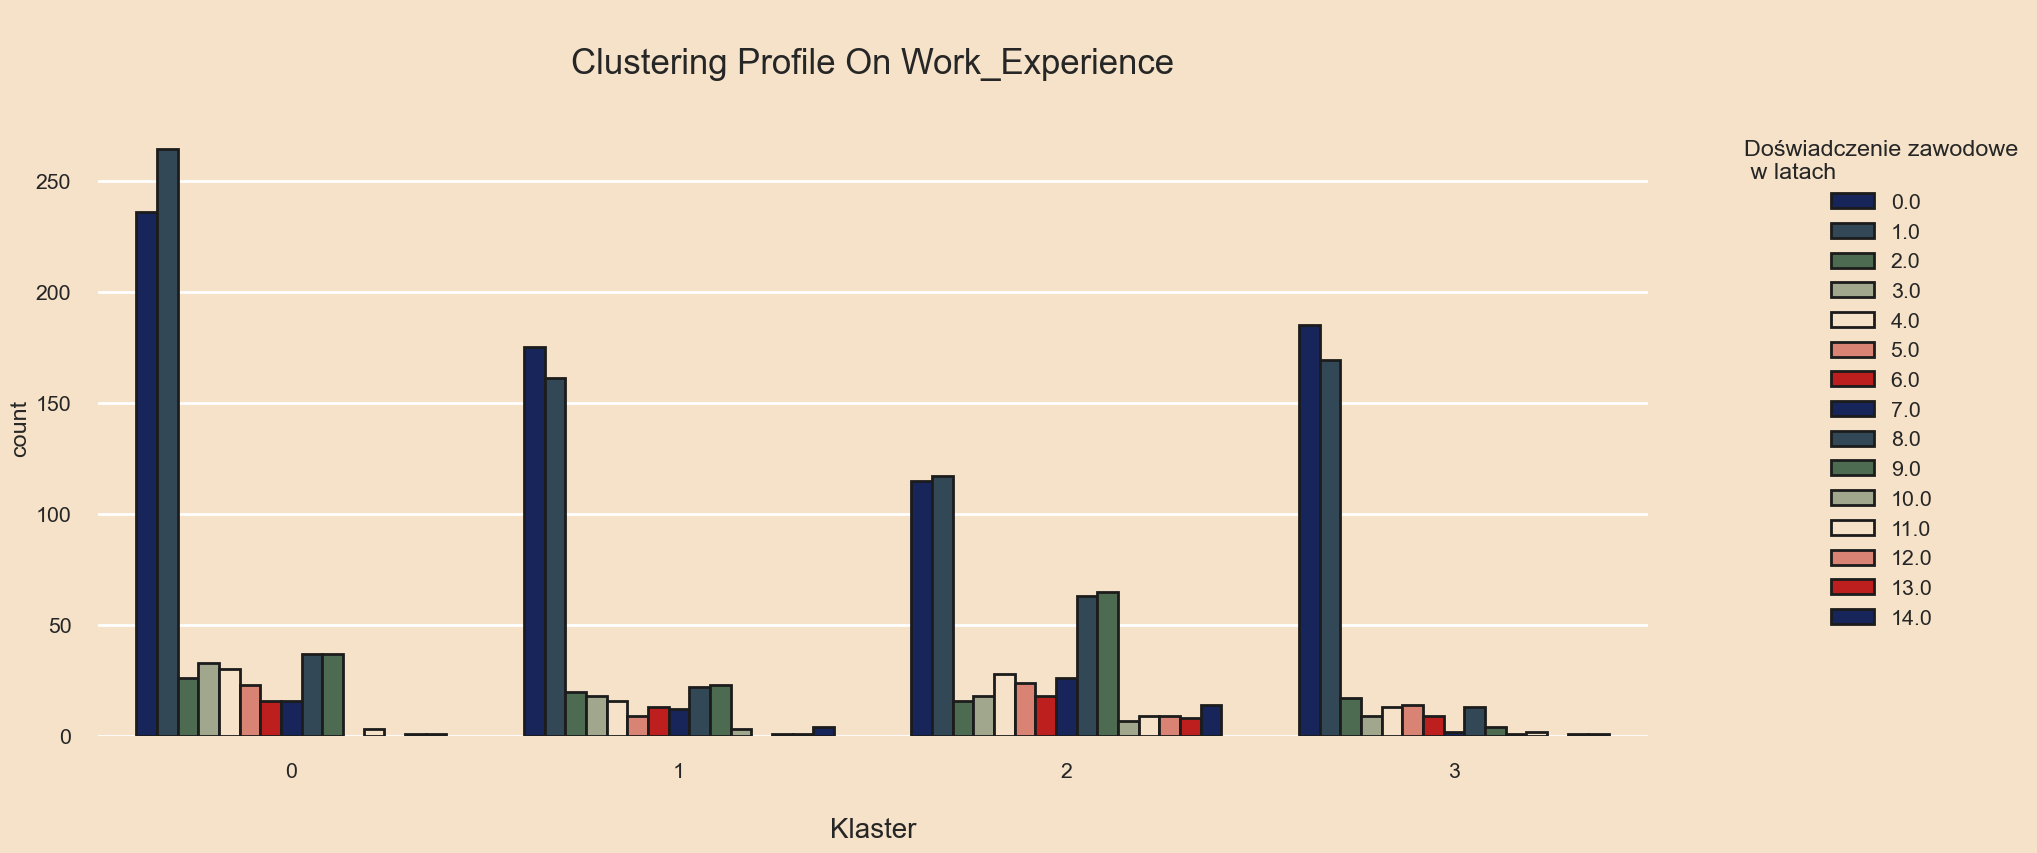

In [116]:
print(f"Characteristics of clusters based on work experience :")

cluster_f("Work_Experience")
cluster_odwrotnie("Work_Experience", "Doświadczenie zawodowe\n w latach")

Characteristics of clusters based on sex :


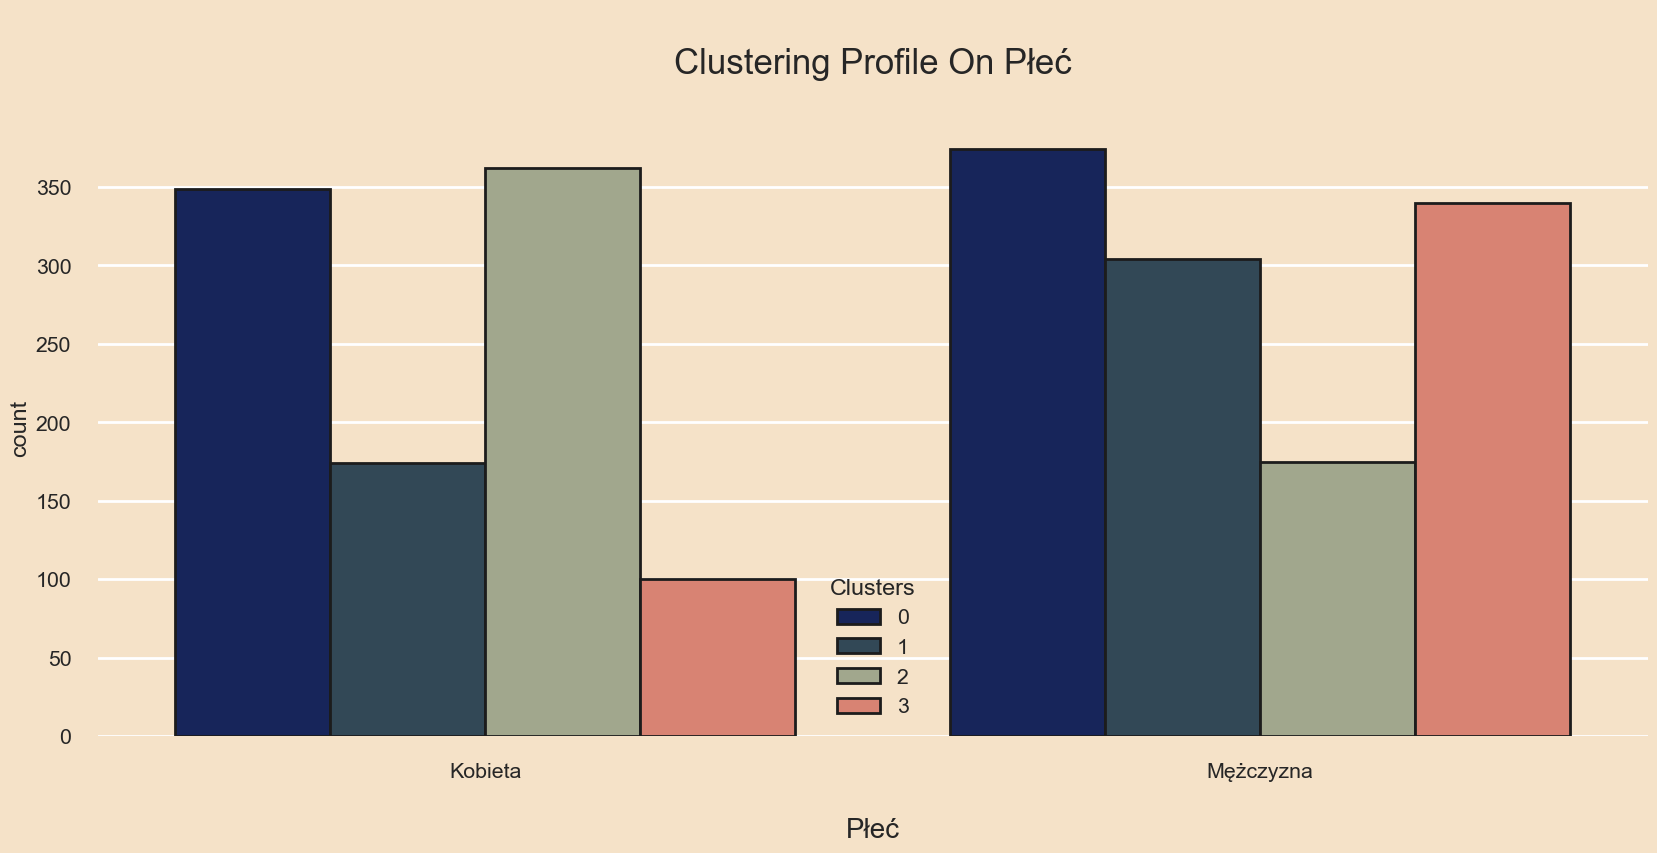

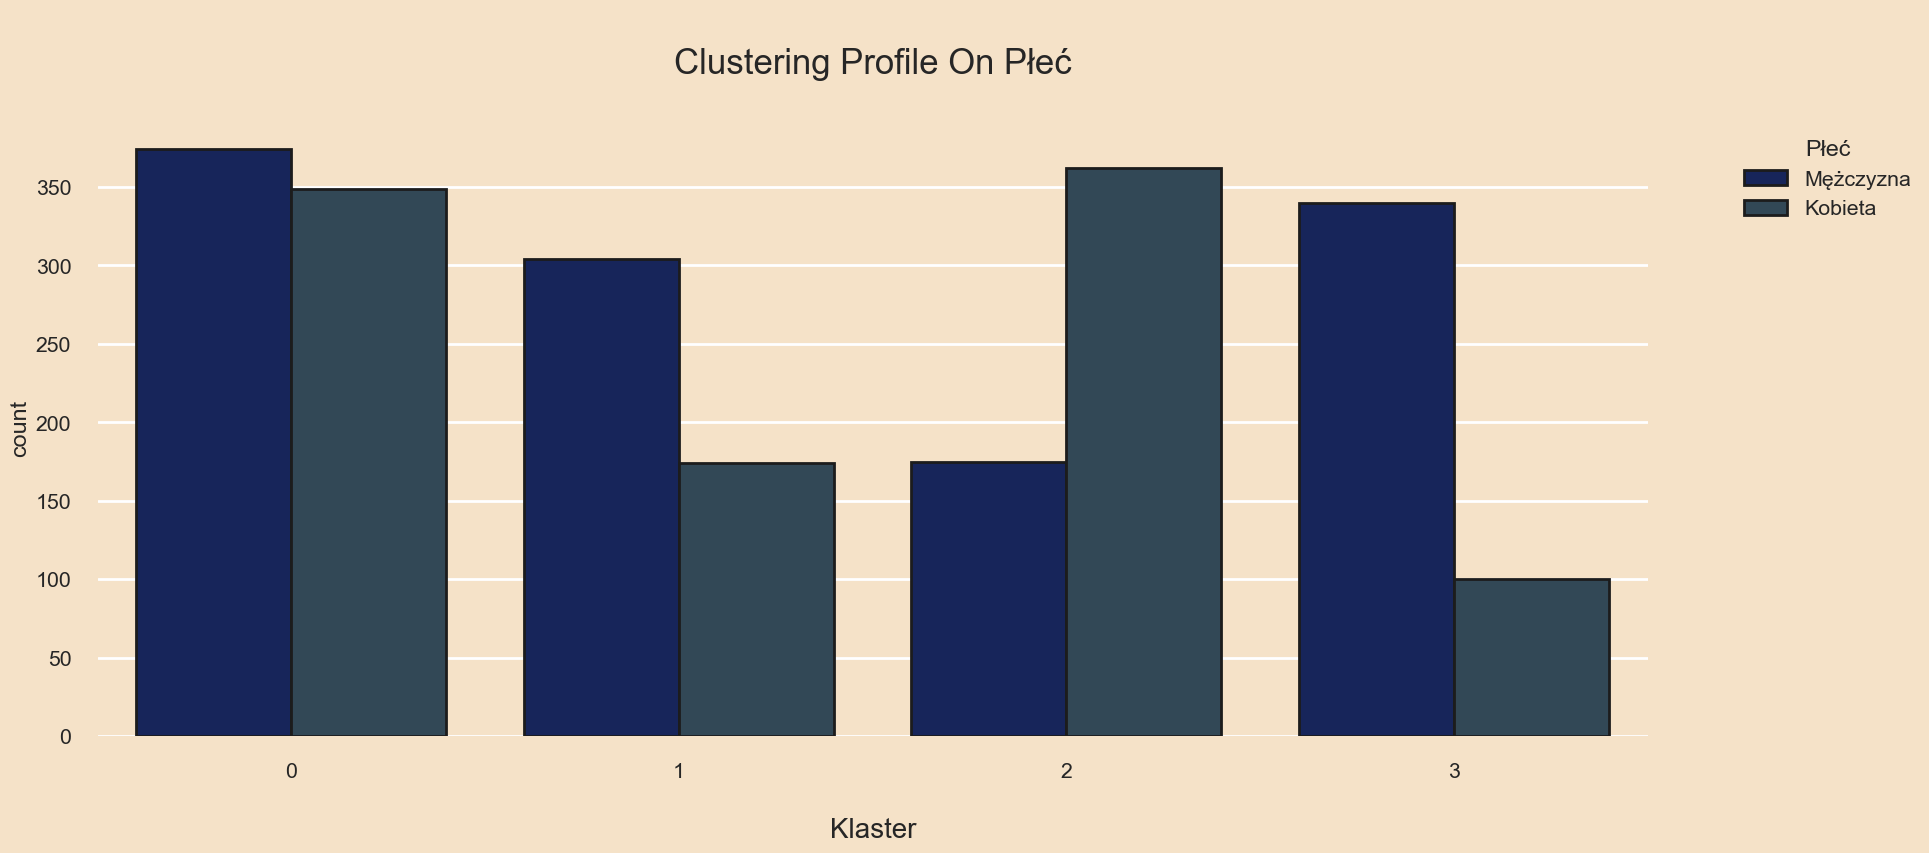

In [117]:
print(f"Characteristics of clusters based on sex :")

mapowanie_cywil = {0: 'Kobieta', 1: 'Mężczyzna'}
new_df['Płeć'] = new_df['Gender'].replace(mapowanie_cywil)
cluster_f("Płeć")
cluster_odwrotnie("Płeć", "Płeć")